Mode decomposition of emotional arcs!
----------------------------------------------


In [13]:
from os import listdir
from os.path import isfile, join
import sys
sys.path.append("/Users/andyreagan/tools/python")
from kitchentable.dogtoys import *
from json import loads
from re import findall,UNICODE
from labMTsimple.labMTsimple.speedy import LabMT
my_LabMT = LabMT()
from labMTsimple.labMTsimple.storyLab import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from database.bookclass import Book_raw_data
import pickle

import os
sys.path.append('/Users/andyreagan/projects/2014/09-books/database')
os.environ.setdefault('DJANGO_SETTINGS_MODULE','gutenbergdb.settings')
import django
django.setup()

from library.models import *

loading LabMT with stopVal=0.0, for 10222 words


In [14]:
# all our essentials
from matplotlib import rc,rcParams
# rc('font', family='sans-serif') 
# rc('font', serif='Helvetica Neue')
# rc('text', usetex='false') 

rc('font', family='serif')
rc('font', family='cmr10')
rc('text', usetex='false') 

rcParams.update({'font.size': 12})
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
from sklearn import metrics
from sklearn.cluster import KMeans
# from the demo
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import scale

In [16]:
q = Book.objects.filter(exclude=False,
                        length__gt=10000,
                        length__lte=200000,
                        downloads__gte=150,
                        numUniqWords__gt=1000,
                        numUniqWords__lt=18000,
                        lang_code_id=0).order_by("gutenberg_id")

In [29]:
# look for a specific book
print(q.filter(gutenberg_id=2701))
print(Book.objects.filter(gutenberg_id=2701)[0].length)
print("-"*8)
print(q.filter(gutenberg_id=1184))
print(Book.objects.filter(gutenberg_id=1184)[0].length)

[]
217059
--------
[]
465910


In [30]:
use_cache = True
num_points = 200
if isfile("data/gutenberg/timeseries-salad-matrix-cache.p") and use_cache:
    big_matrix = pickle.load(open("data/gutenberg/timeseries-salad-matrix-cache.p","rb"))
else:
    # load all of the timeseries into a matrix
    big_matrix = np.ones([len(q),num_points])
    # big_matrix_mean0 = np.ones(big_matrix.shape)
    stop_val = 1.0
    for i,b in enumerate(q):
        if i%25 == 0:
            print(i)
        # print(b.title)
        b_data = Book_raw_data(b)
        a = b_data.chopper_sliding(my_LabMT,num_points=num_points,stop_val=stop_val,randomize=True)
        big_matrix[i,:] = b_data.timeseries
    print(big_matrix.shape)
    pickle.dump(big_matrix,open("data/gutenberg/timeseries-salad-matrix-cache.p","wb"),pickle.HIGHEST_PROTOCOL)
    
big_matrix_mean0 = big_matrix-np.tile(big_matrix.mean(axis=1),(num_points,1)).transpose()
big_matrix_start0 = big_matrix-np.tile(big_matrix[:,0],(num_points,1)).transpose()

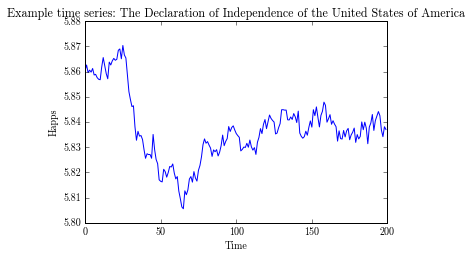

In [31]:
# print(big_matrix[0,:])
fig = plt.figure()
ax = fig.add_axes([.2,.2,.7,.7])
ax.plot(big_matrix[0,:])
ax.set_xlabel("Time")
ax.set_ylabel("Happs")
ax.set_title("Example time series: {}".format(q[0].title))
# mysavefig("example-timeseries.pdf",folder="media/figures/SVD",openfig=False)

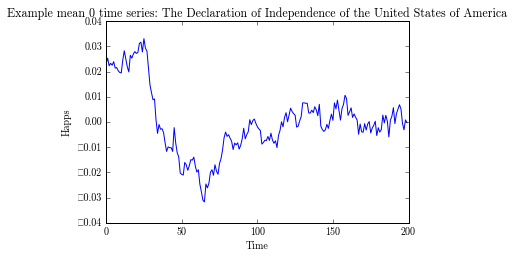

In [32]:
# print(big_matrix[0,:])
fig = plt.figure()
ax = fig.add_axes([.2,.2,.7,.7])
ax.plot(big_matrix_mean0[0,:])
ax.set_xlabel("Time")
ax.set_ylabel("Happs")
ax.set_title("Example mean 0 time series: {}".format(q[0].title))
# mysavefig("example-timeseries-mean0.pdf",folder="media/figures/SVD",openfig=False)

In [33]:
big_matrix.shape

(1751, 200)

The Declaration of Independence of the United States of America
['===========================================================', 'note', 'this', 'file', 'combines', 'the', 'first', 'two', 'project', 'gutenberg']
['===========================================================', 'note', 'this', 'file', 'combines', 'the', 'first', 'two', 'project', 'gutenberg']
['reach', 'in', 'person', 'taking', 'have', 'individuals', 'or', 'states', 'of', 'bonds']
['reach', 'in', 'person', 'taking', 'have', 'individuals', 'or', 'states', 'of', 'bonds']
['of', 'has', 'chuse', 'domestic', 'the', 'was', 'pledge', 'not', 'from', 'glory']
['of', 'has', 'chuse', 'domestic', 'the', 'was', 'pledge', 'not', 'from', 'glory']
['us', 'of', '**etexts', 'states', 'no', 'to', 'justice', 'be', 'little', 'us']
['us', 'of', '**etexts', 'states', 'no', 'to', 'justice', 'be', 'little', 'us']
['we', 'to', 'you', 'laws', 'being', 'he', 'bill', 'records', 'to', 'all']
['we', 'to', 'you', 'laws', 'being', 'he', 'bill', 'records',

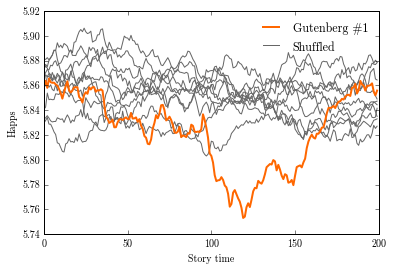

In [44]:
b = q[0]
print(b.title)
b_data = Book_raw_data(b)
a = b_data.chopper_sliding(my_LabMT,num_points=200,stop_val=1.0,randomize=False)
plt.figure()
plt.plot(b_data.timeseries,color="#ff6700",linewidth=2,zorder=2,label="Gutenberg #{}".format(b.gutenberg_id))

for i in range(10):
    a = b_data.chopper_sliding(my_LabMT,num_points=200,stop_val=1.0,randomize=True)
    if i==0:
        plt.plot(b_data.timeseries,color=".4",linewidth=1,zorder=1,label="Shuffled".format(b.gutenberg_id))
    else:
        plt.plot(b_data.timeseries,color=".4",linewidth=1,zorder=1,label=None)

plt.legend(frameon=0,framealpha=.9)
plt.ylabel("Happs")
plt.xlabel("Story time")
mysavefig("shuffled-{}.pdf".format(b.gutenberg_id),folder="media/figures/gutenberg-details")

In [ ]:
# nmf = NMF(n_components=100)
# nmf.fit(bigmatrix)

In [12]:
# plt.subplot(2,3,1)
# plt.plot(nmf.components_[0])
# plt.subplot(2,3,2)
# plt.plot(nmf.components_[1])
# plt.subplot(2,3,3)
# plt.plot(nmf.components_[2])
# plt.subplot(2,3,4)
# plt.plot(nmf.components_[3])
# plt.subplot(2,3,5)
# plt.plot(nmf.components_[4])
# plt.subplot(2,3,6)
# plt.plot(nmf.components_[5])
# mysavefig('nnmf-100components-first6.pdf')

In [13]:
pca = PCA(n_components='mle')
pca.fit(big_matrix)

PCA(copy=True, n_components='mle', whiten=False)

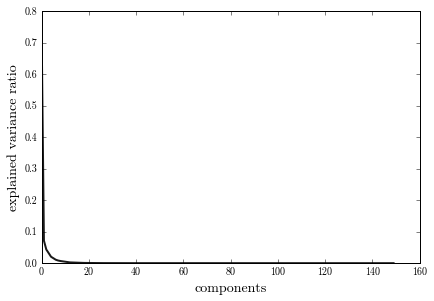

In [14]:
fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(pca.explained_variance_ratio_,color=".1",linewidth=2)
ax1.set_ylabel('explained variance ratio',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
mysavefig("PCA-ncomponents-variance.pdf",folder="media/figures/SVD",openfig=False)

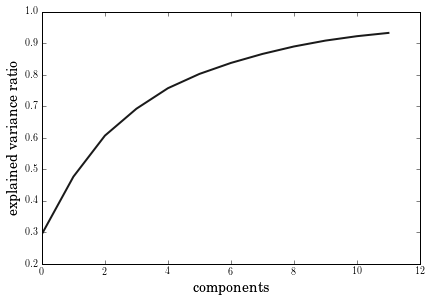

In [118]:
fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(np.cumsum(pca.explained_variance_ratio_),color=".1",linewidth=2)
ax1.set_ylabel('explained variance ratio',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
mysavefig("PCA-ncomponents-variance-cum.pdf",folder="media/figures/SVD",openfig=False)

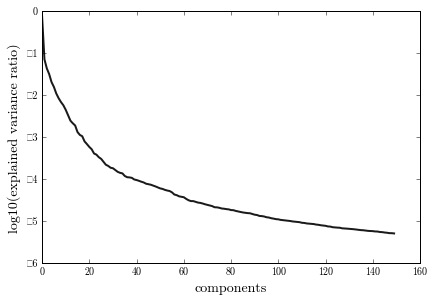

In [15]:
fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(np.log10(pca.explained_variance_ratio_),color=".1",linewidth=2)
ax1.set_ylabel('log10(explained variance ratio)',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig('pca-{0}components-explainedvariance.svg'.format(pca.n_components_))
mysavefig("PCA-ncomponents-log10variance.pdf",folder="media/figures/SVD",openfig=False)

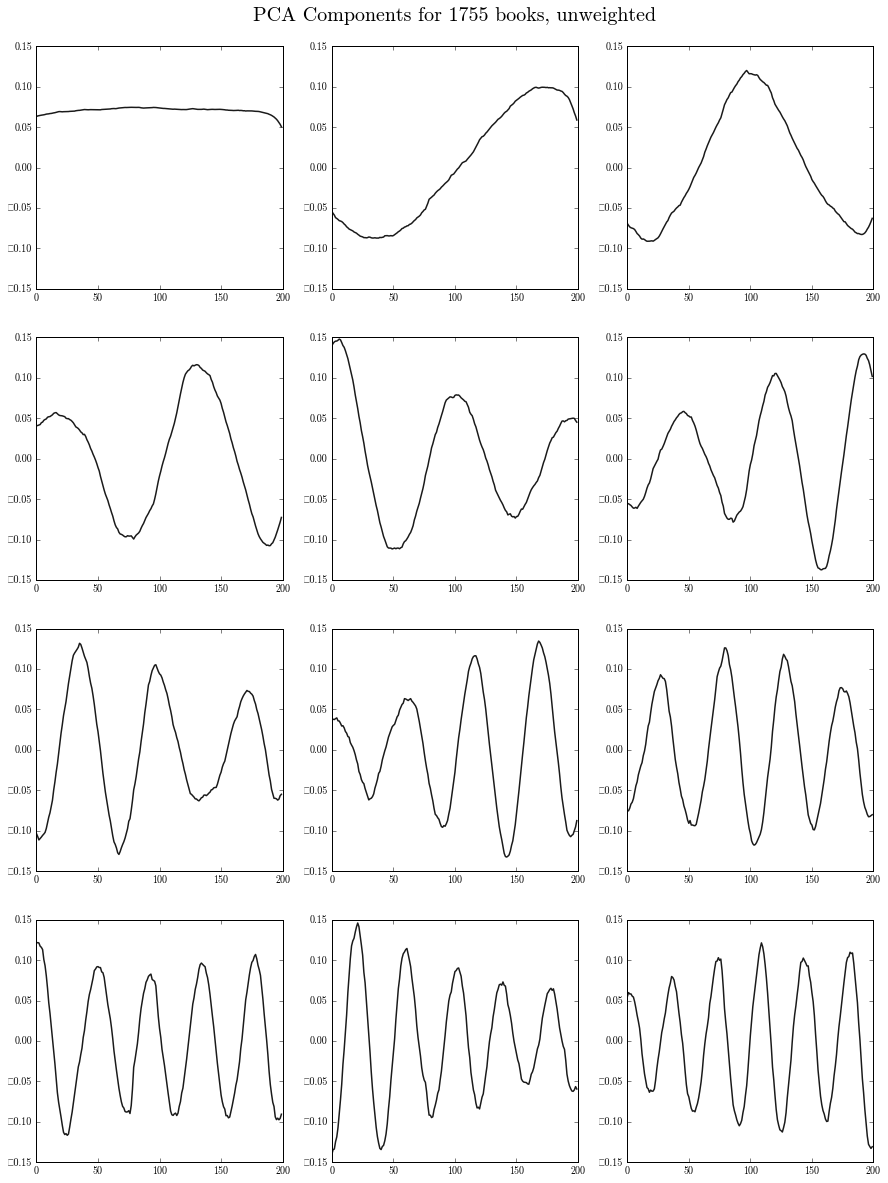

In [16]:
fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(pca.components_[i],color=".1",linewidth=1.5)
    plt.ylim([-.15,.15])
plt.subplot(4,3,2)
plt.title("PCA Components for {} books, unweighted\n".format(len(q)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
mysavefig("PCA-ncomponents-top12-timeseries-weighted.pdf",folder="media/figures/SVD",openfig=False)

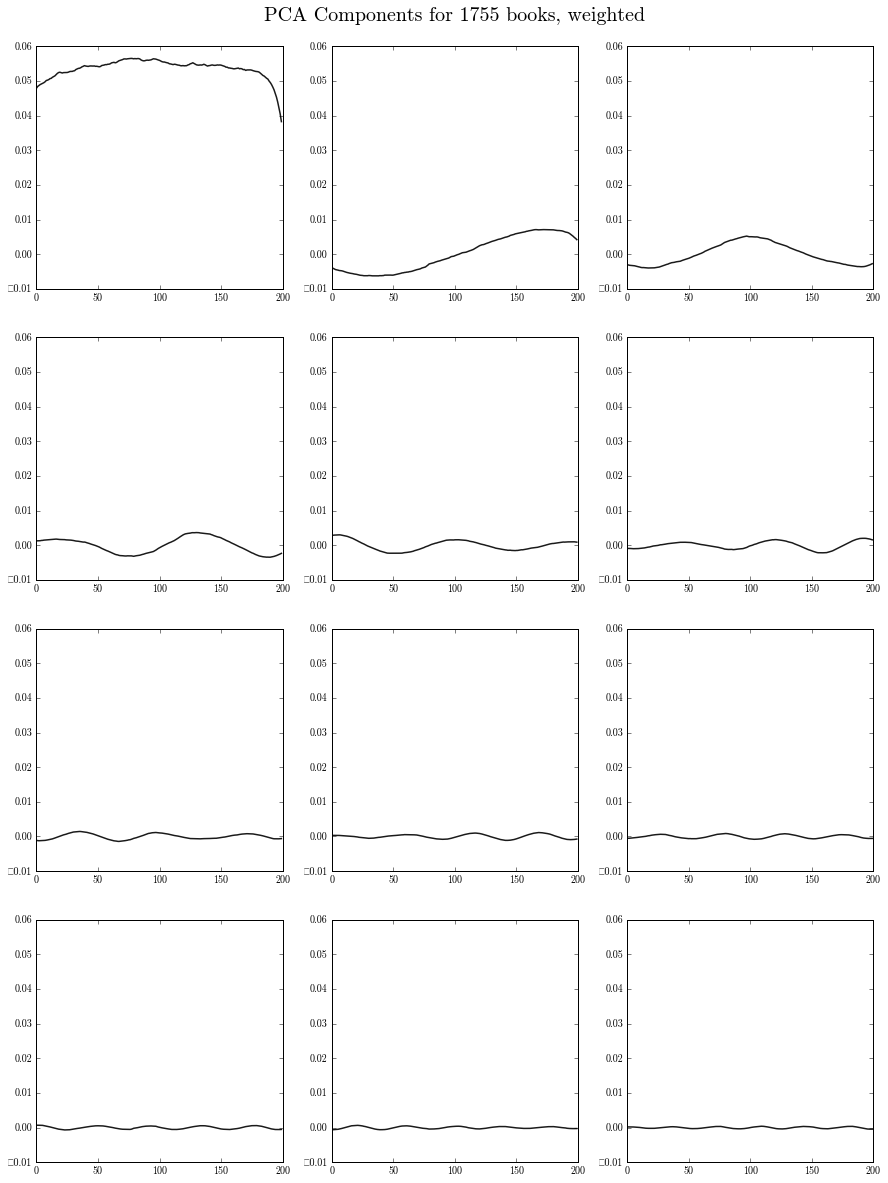

In [17]:
fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(pca.components_[i]*pca.explained_variance_ratio_[i],color=".1",linewidth=1.5)
    plt.ylim([-.01,.06])
plt.subplot(4,3,2)
plt.title("PCA Components for {} books, weighted\n".format(len(q)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
mysavefig("PCA-ncomponents-top12-timeseries-unweighted.pdf",folder="media/figures/SVD",openfig=False)

(removed much) suffice to say that PCA algorithm not sensitive to num components set

In [18]:
pca = PCA(n_components=12)
pca.fit(big_matrix_mean0)
print(pca.n_components_)

12


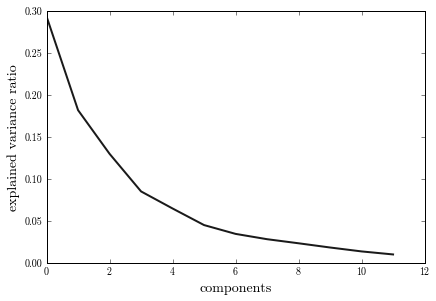

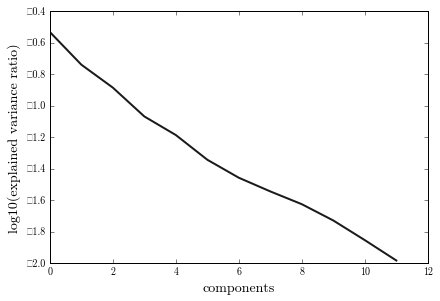

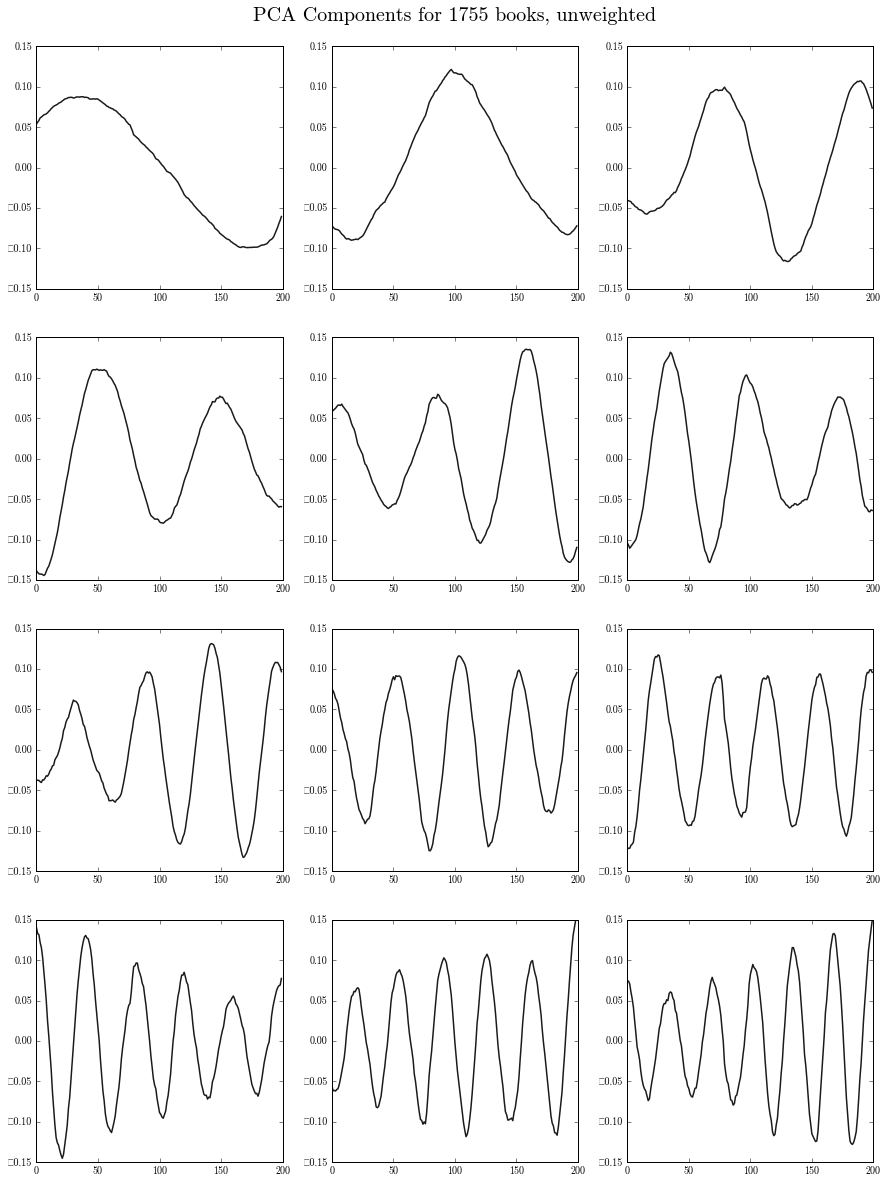

In [19]:
fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(pca.explained_variance_ratio_,linewidth=2,color=".1")
ax1.set_ylabel('explained variance ratio',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig('pca-{0}components-explainedvariance-mean0.png'.format(pca.n_components_))
mysavefig("PCA-ncomponents-variance-mean0.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(np.log10(pca.explained_variance_ratio_),color=".1",linewidth=2)
ax1.set_ylabel('log10(explained variance ratio)',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig('pca-{0}components-explainedvariance-mean0.png'.format(pca.n_components_))
mysavefig("PCA-ncomponents-log10variance-mean0.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(pca.components_[i],color=".1",linewidth=1.5)
    plt.ylim([-.15,.15])
plt.subplot(4,3,2)
plt.title("PCA Components for {} books, unweighted\n".format(len(q)),fontsize=20)
mysavefig("PCA-ncomponents-timeseries-unweighted-mean0.pdf",folder="media/figures/SVD",openfig=False)

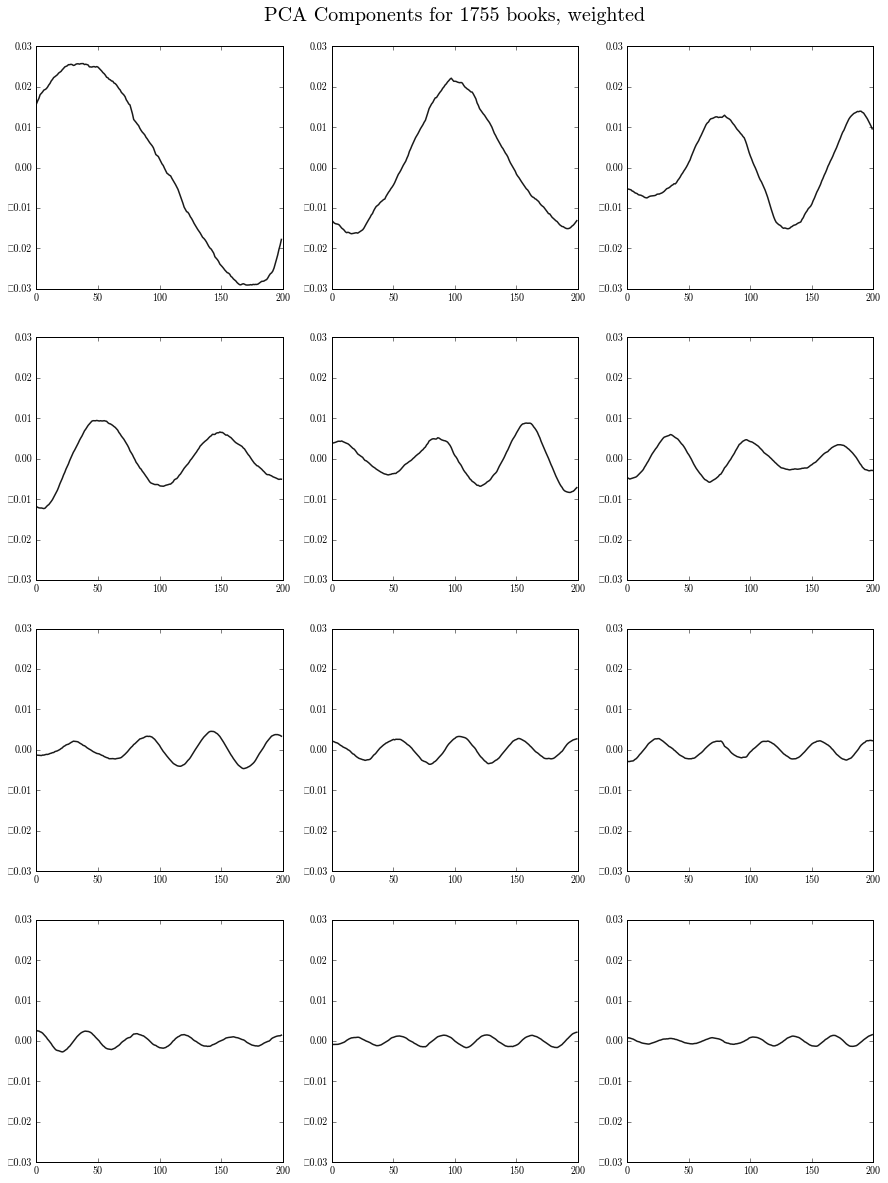

In [20]:
fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(pca.components_[i]*pca.explained_variance_ratio_[i],color=".1",linewidth=1.5)
    plt.ylim([-.03,.03])
plt.subplot(4,3,2)
plt.title("PCA Components for {} books, weighted\n".format(len(q)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
mysavefig("PCA-ncomponents-timeseries-weighted-mean0.pdf",folder="media/figures/SVD",openfig=False)

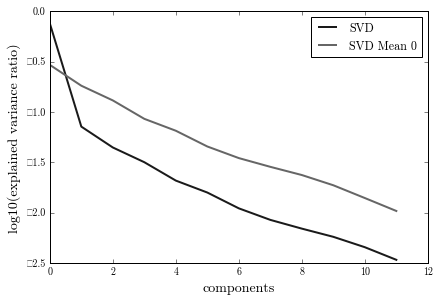

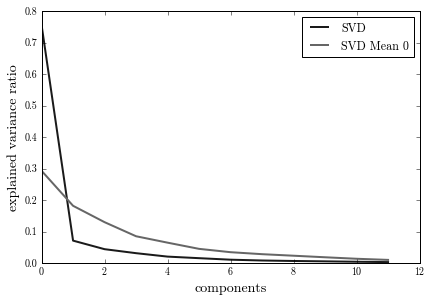

In [21]:
# pca = PCA(n_components='mle')
svd = TruncatedSVD(n_components=12,algorithm='arpack')
svd.fit(big_matrix)
# svd.n_components_

fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(np.log10(svd.explained_variance_ratio_),linewidth=2,color=".1")


# pca = PCA(n_components='mle')
svd2 = TruncatedSVD(n_components=12,algorithm='arpack')
svd2.fit(big_matrix_mean0)
# svd.n_components_

ax1.plot(np.log10(svd2.explained_variance_ratio_),linewidth=2,color=".4")
ax1.legend(['SVD','SVD Mean 0'])
ax1.set_ylabel('log10(explained variance ratio)',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
mysavefig("SVD-variance.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(svd.explained_variance_ratio_,linewidth=2,color=".1")
ax1.plot(svd2.explained_variance_ratio_,linewidth=2,color=".4")
ax1.legend(['SVD','SVD Mean 0'])
ax1.set_ylabel('explained variance ratio',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig('svd-{0}components-30-50-explainedvariance-both.svg'.format(12))
# mysavefig('svd-{0}components-30-50-explainedvariance-both.png'.format(12))
mysavefig("SVD-log10variance.pdf",folder="media/figures/SVD",openfig=False)

In [120]:
print(np.cumsum(svd.explained_variance_ratio_))
print(np.cumsum(svd2.explained_variance_ratio_))

[ 0.756132    0.82771134  0.87215028  0.90389212  0.92475014  0.94062703
  0.95169189  0.96019347  0.96715625  0.9729292   0.97748384  0.98089801]
[ 0.29328581  0.47544675  0.60564186  0.69112108  0.75626001  0.80171699
  0.83658973  0.86515006  0.88883546  0.90758181  0.92158601  0.93200644]


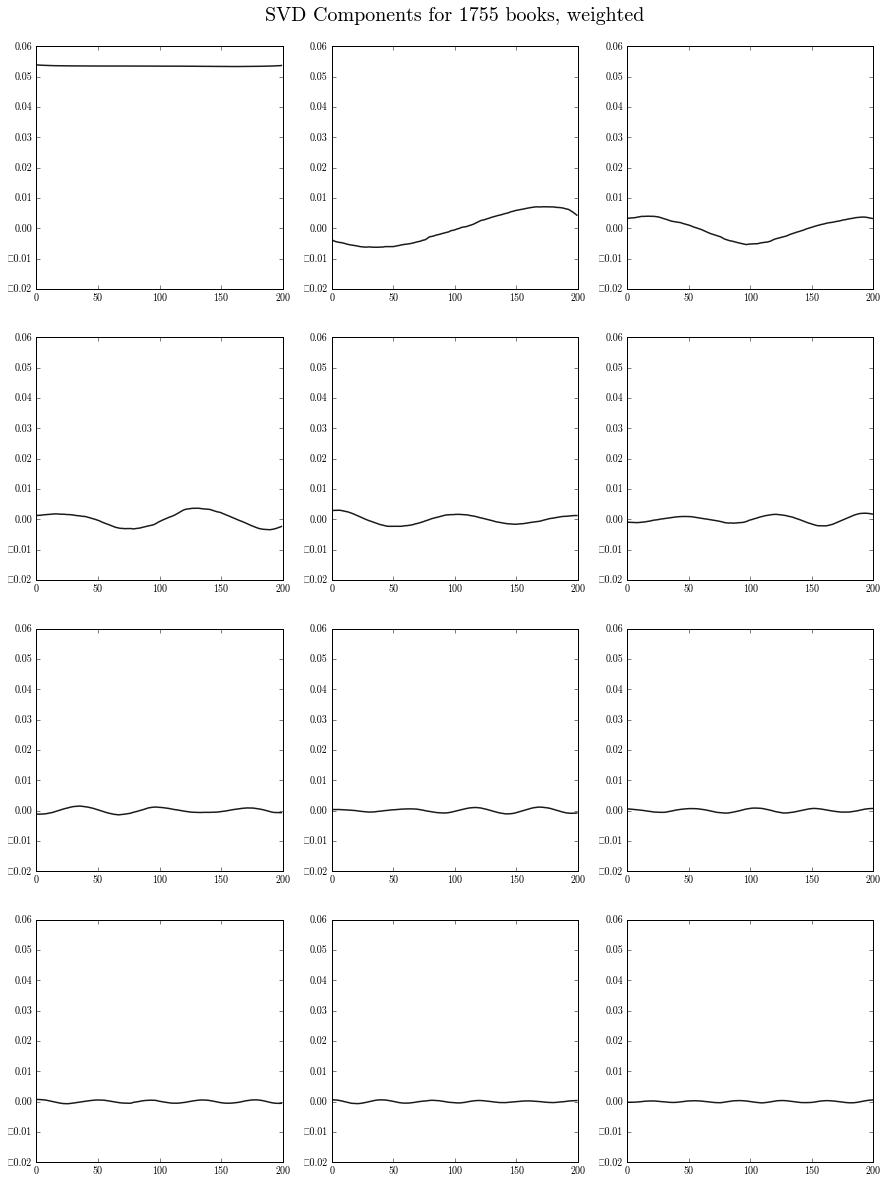

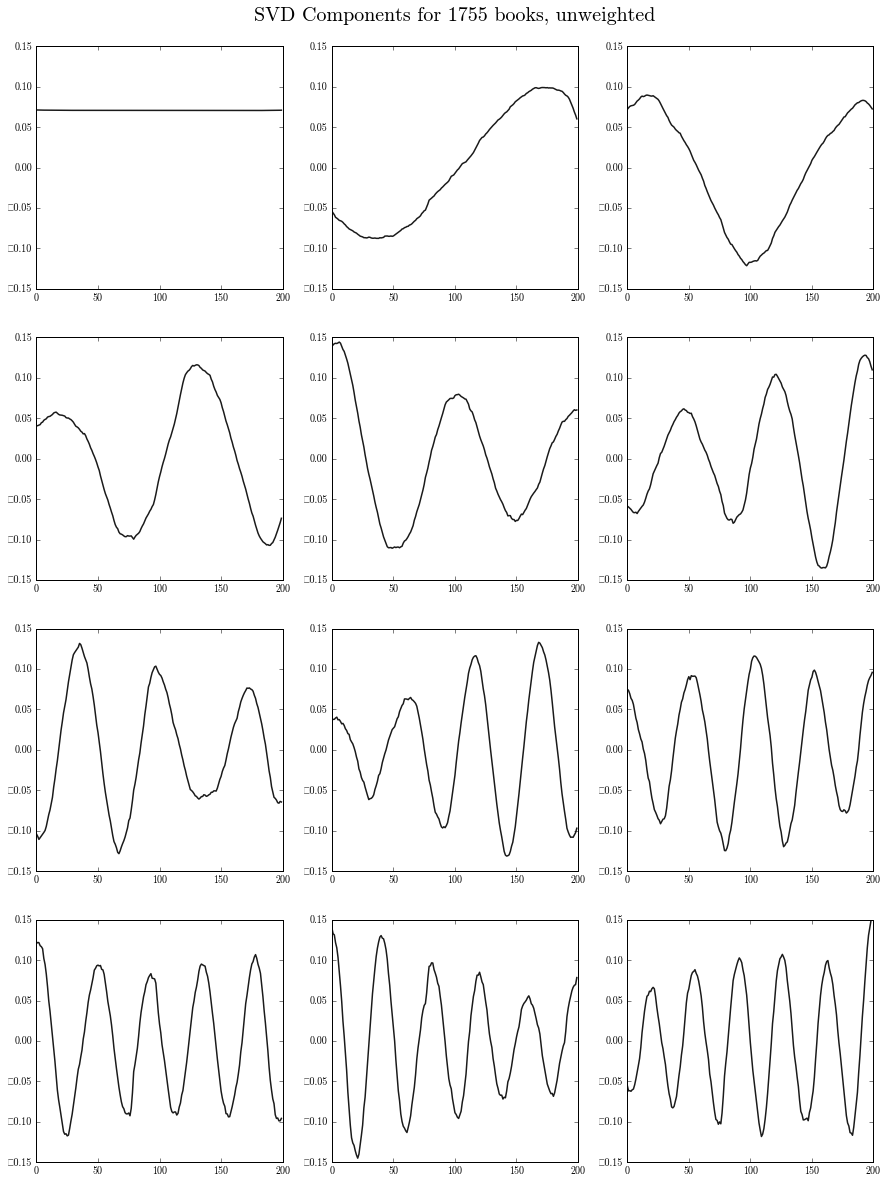

In [22]:
fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(svd.components_[i]*svd.explained_variance_ratio_[i],color=".1",linewidth=1.5)
    plt.ylim([-.02,.06])
plt.subplot(4,3,2)
plt.title("SVD Components for {} books, weighted\n".format(len(q)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
mysavefig("SVD-timeseries-weighted.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(svd.components_[i],color=".1",linewidth=1.5)
    plt.ylim([-.15,.15])
plt.subplot(4,3,2)
plt.title("SVD Components for {} books, unweighted\n".format(len(q)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
mysavefig("SVD-timeseries-unweighted.pdf",folder="media/figures/SVD",openfig=False)

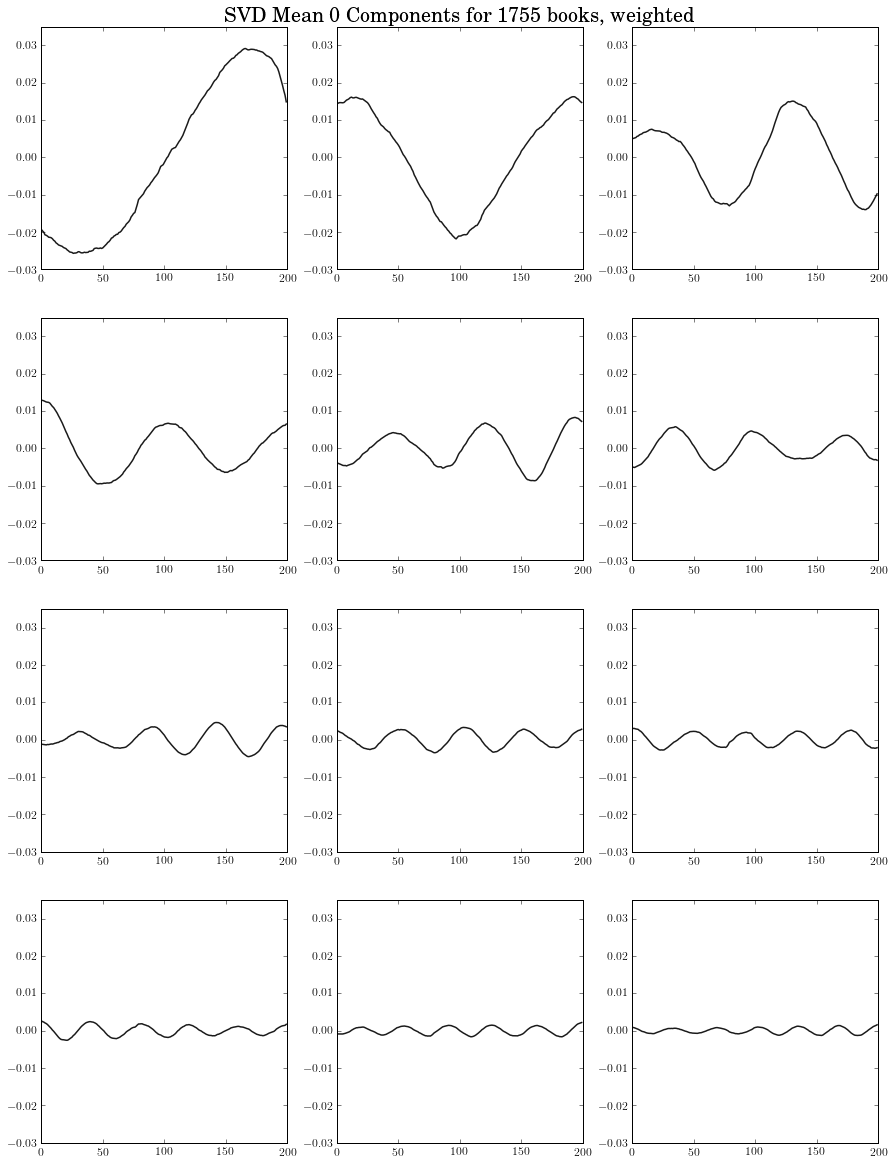

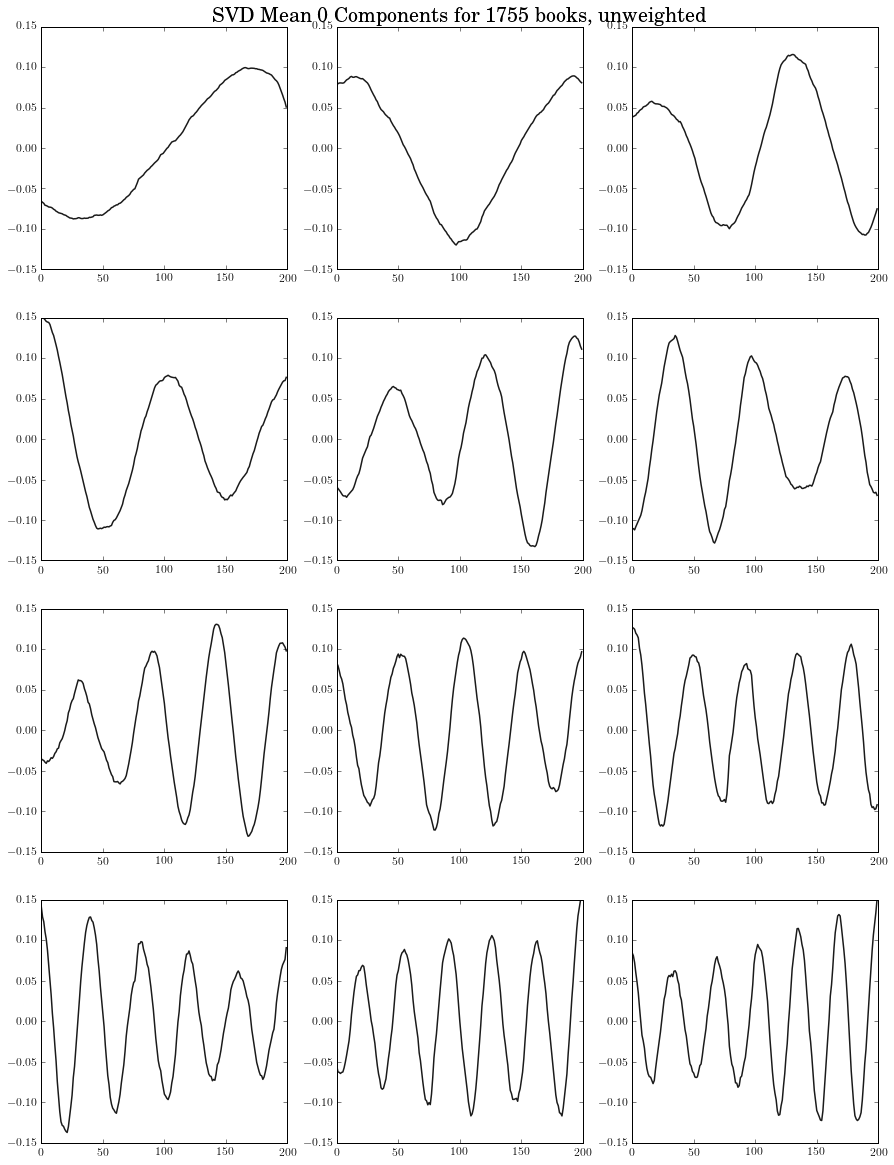

In [85]:
fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(svd2.components_[i]*svd2.explained_variance_ratio_[i],color=".1",linewidth=1.5)
    plt.ylim([-.03,.035])
plt.subplot(4,3,2)
plt.title("SVD Mean 0 Components for {} books, weighted".format(len(q)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
mysavefig("SVD-timeseries-weighted-mean0.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(svd2.components_[i],color=".1",linewidth=1.5)
    plt.ylim([-.15,.15])
plt.subplot(4,3,2)
plt.title("SVD Mean 0 Components for {} books, unweighted".format(len(q)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
mysavefig("SVD-timeseries-unweighted-mean0.pdf",folder="media/figures/SVD",openfig=False)

xwidth is 0.3
yheight is 0.22249999999999998


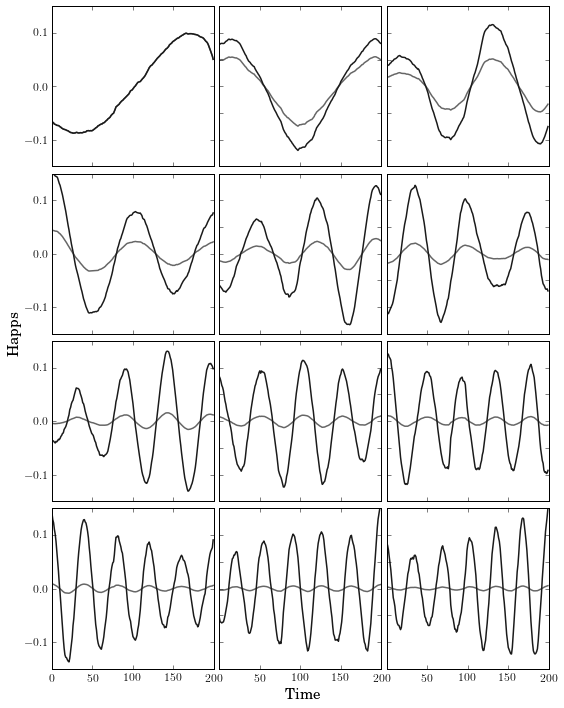

In [107]:
def mode_plot_tight(title,modes,submodes,saveas,ylim=.15):
    num_x = 3
    num_y = len(modes)/num_x
    xspacing = .01
    yspacing = .01
    xoffset = .07
    yoffset = .07
    xwidth = (1.-xoffset)/(num_x)-xspacing
    yheight = (1.-yoffset)/(num_y)-yspacing
    print('xwidth is {0}'.format(xwidth))
    print('yheight is {0}'.format(yheight))

    fig = plt.figure(figsize=(7.5,10))
    for i,mode in enumerate(modes):
#         print(i)
#         print("====")
#         print((i-i%num_x))
        # ind = np.argsort(w[:,sv+svstart])[-20:]
        ax1rect = [xoffset+(i%num_x)*(xspacing+xwidth),1.-yheight-yspacing-(int(np.floor((i-i%num_x)/num_x))*(yspacing+yheight)),xwidth,yheight]
        ax1 = fig.add_axes(ax1rect)
        # plt.subplot(4,3,i+1)
        ax1.plot(submodes[i],color=".4",linewidth=1.5)
        ax1.plot(modes[i],color=".1",linewidth=1.5)
        ax1.set_ylim([-ylim,ylim])
        if not i%num_x == 0:
            ax1.set_yticklabels([])
            if int(np.floor((i-i%num_x)/num_x)) == num_y-1:
                ax1.set_xticks([50,100,150,200])
        if not int(np.floor((i-i%num_x)/num_x)) == num_y-1:
            ax1.set_xticklabels([])
#         if int(np.floor((i-i%num_x)/num_x)) == num_y-1 and i%num_x == 1:
#             ax1.set_xlabel("Time")
#         if i == 0:
#             new_ticks = [x for x in ax1.yaxis.get_ticklocs()]
#             ax1.set_yticks(new_ticks)
#             new_ticklabels = [str(x) for x in new_ticks]
#             new_ticklabels[-1] = "Happs"
#             # ax1.set_yticklabels(new_ticklabels)
        if i%num_x == 0:
            # new_ticks = [x for x in ax1.yaxis.get_ticklocs()]
            # ax1.set_yticks(new_ticks[:-2])
            ax1.set_yticks([-.1,0,.1])
    fig.text((1.-xoffset)/2.+xoffset,yoffset/2.,"Time",verticalalignment='center', horizontalalignment='center',fontsize=15) #,horizontalalign="center")    
    # plt.subplot(4,3,2)
    fig.text(0,(1.-yoffset)/2.+yoffset,"Happs",verticalalignment='center', horizontalalignment='center',fontsize=15,rotation=90) #,horizontalalign="center"
    
    # mysavefig('pca-MLEcomponents-first12.png')
    mysavefig(saveas,folder="media/figures/SVD",openfig=False)
    
weighted = [svd2.components_[i]*svd2.explained_variance_ratio_[i]/svd2.explained_variance_ratio_[0] for i in range(12)]
mode_plot_tight("SVD Mean 0 Components for {} books, unweighted".format(len(q)),svd2.components_,weighted,"SVD-timeseries-unweighted-mean0.pdf")

(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    2.,    0.,    1.,    1.,    0.,    2.,    0.,
           4.,    1.,    1.,    3.,    4.,    5.,    5.,    5.,   13.,
          18.,   18.,   26.,   24.,   29.,   29.,   61.,   44.,   53.,
          62.,   85.,   87.,   89.,   91.,   86.,  109.,  118.,  116.,
          95.,   92.,   61.,   61.,   46.,   44.,   42.,   24.,   22.,
          19.,   16.,    8.,   12.,    7.,    5.,    3.,    2.,    0.,    2.]),
 array([ 3.67402718,  3.70011237,  3.72619756,  3.75228274,  3.77836793,
         3.80445312,  3.83053831,  3.85662349,  3.88270868,  3.90879387,
         3.93487906,  3.96096424,  3.98704943,  4.01313462,  4.0

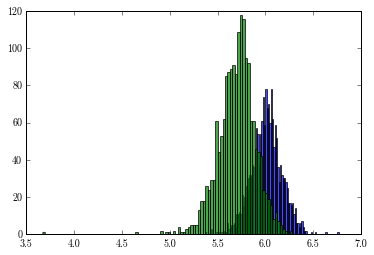

In [24]:
allMax = np.amax(big_matrix,axis=1)
allMin = np.amin(big_matrix,axis=1)
plt.hist(allMax,bins=100,alpha=0.7)
plt.hist(allMin,bins=100,alpha=0.7)

In [25]:
U,S,V = np.linalg.svd(big_matrix_mean0,full_matrices=True,compute_uv=True)

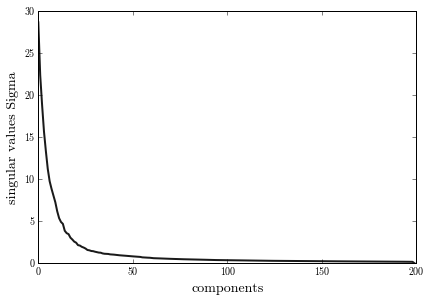

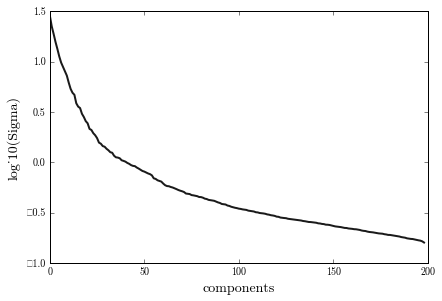

In [26]:
fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(S,linewidth=2,color=".1")
ax1.set_ylabel('singular values Sigma',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig('pca-{0}components-explainedvariance-mean0.png'.format(pca.n_components_))
mysavefig("SVD-variance-numpy.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(np.log10(S[:-1]),color=".1",linewidth=2)
ax1.set_ylabel('log_10(Sigma)',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig('pca-{0}components-explainedvariance-mean0.png'.format(pca.n_components_))
mysavefig("SVD-log10variance-numpy.pdf",folder="media/figures/SVD",openfig=False)

In [27]:
print(U.shape)
print(S.shape)
print(V.shape)

(1755, 1755)
(200,)
(200, 200)


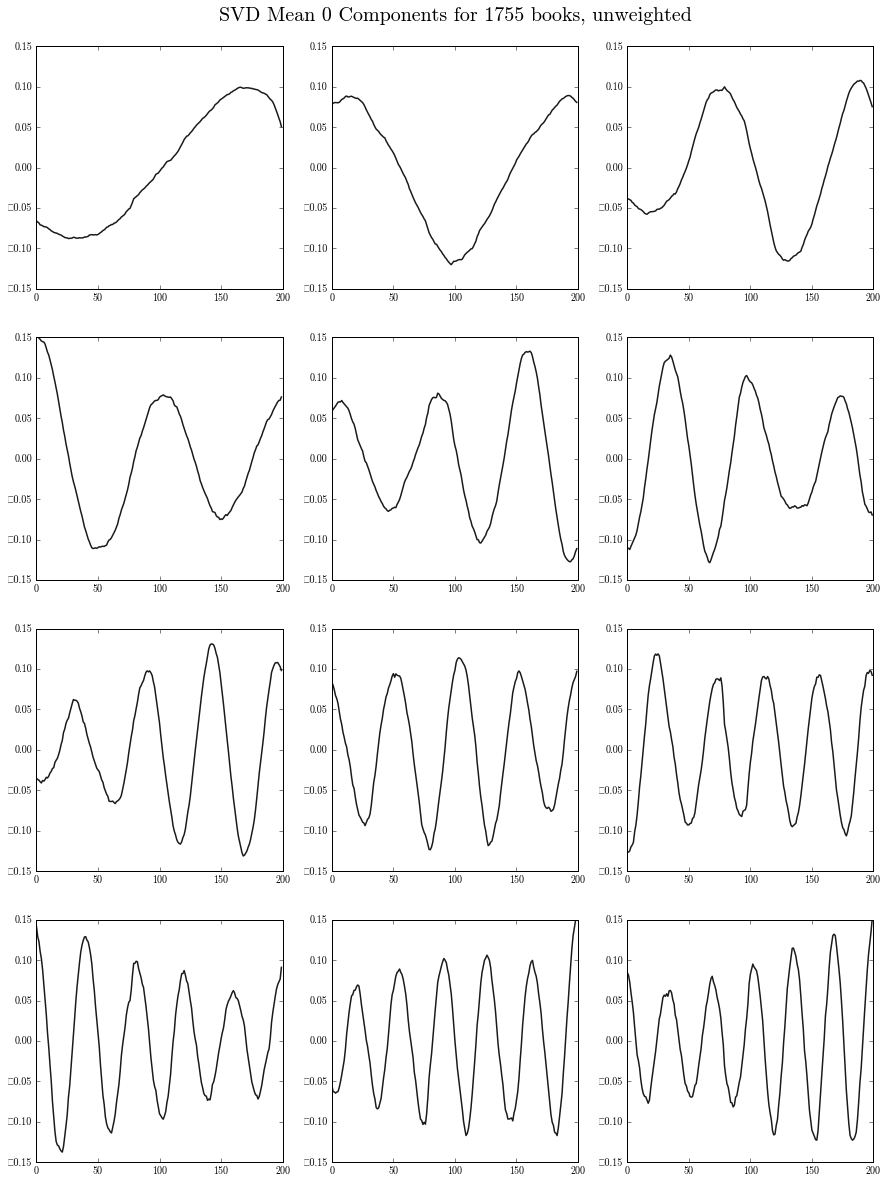

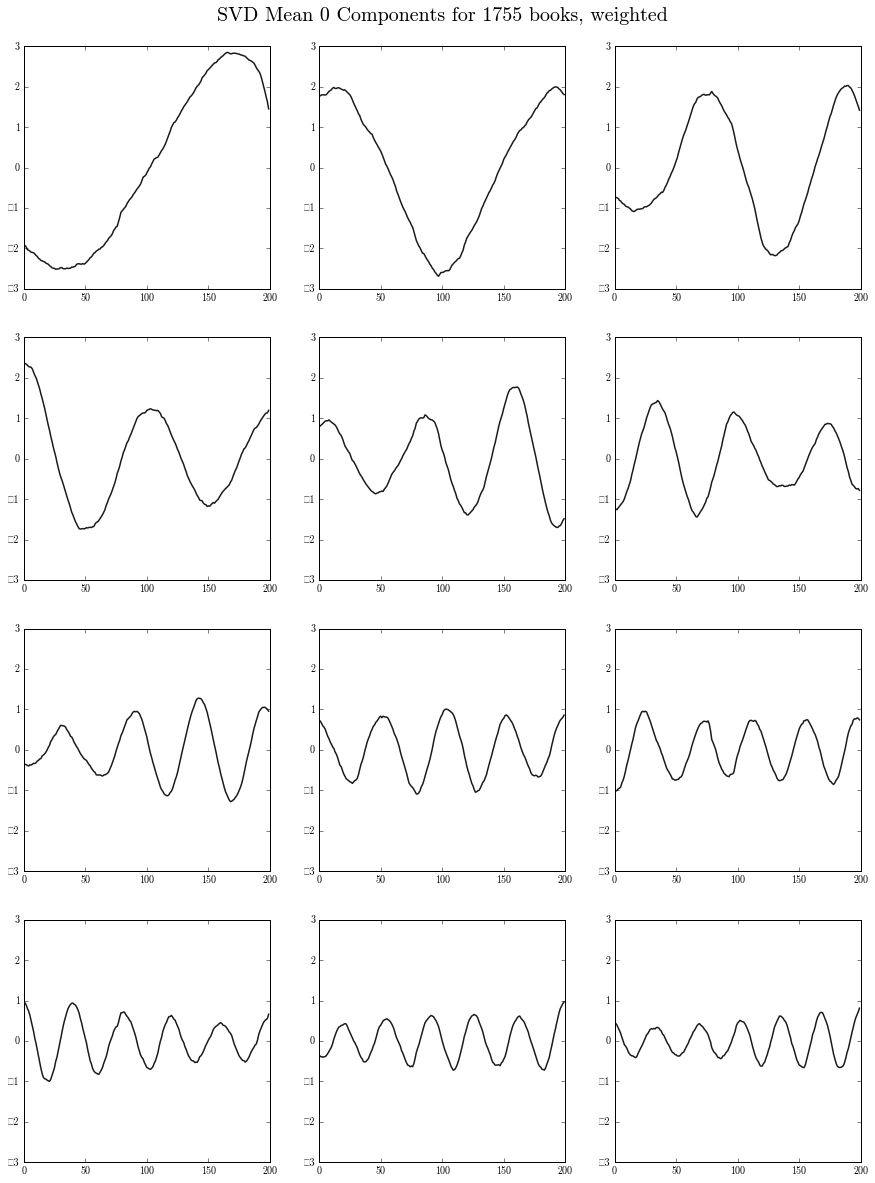

In [28]:
fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(V[i,:],color=".1",linewidth=1.5)
    plt.ylim([-.15,.15])
plt.subplot(4,3,2)
plt.title("SVD Mean 0 Components for {} books, unweighted\n".format(len(q)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
mysavefig("SVD-timeseries-unweighted-mean0-numpy.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(V[i,:]*S[i],color=".1",linewidth=1.5)
    plt.ylim([-3,3])
plt.subplot(4,3,2)
plt.title("SVD Mean 0 Components for {} books, weighted\n".format(len(q)),fontsize=20)
mysavefig("SVD-timeseries-weighted-mean0-numpy.pdf",folder="media/figures/SVD",openfig=False)

### Now let's use the SVD's USV matrices to examine how each mode contributes

Start by constructing w, the intermediate product U*S

(1755, 200)
-2.41524550731
5.12630965701


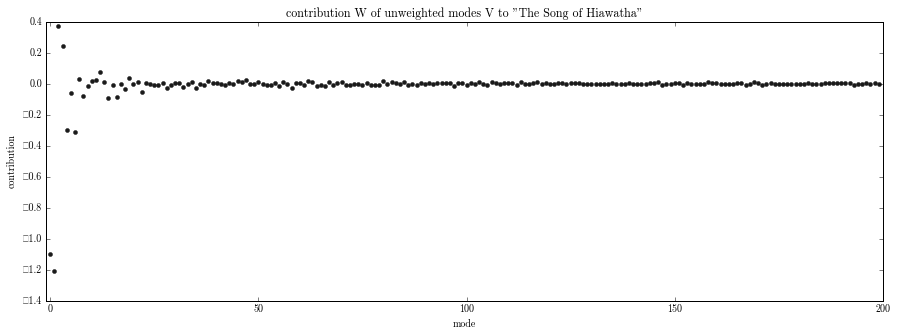

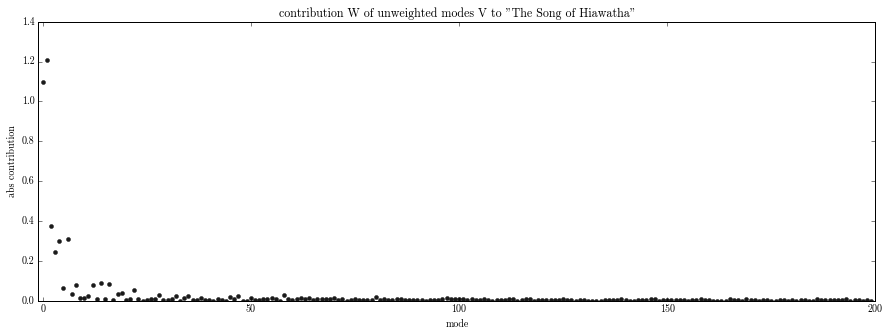

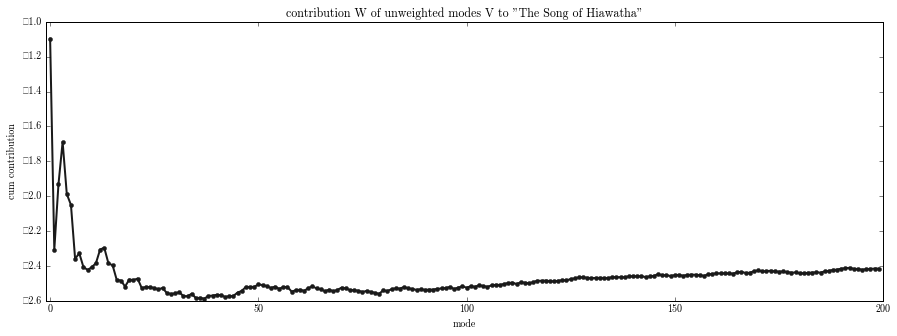

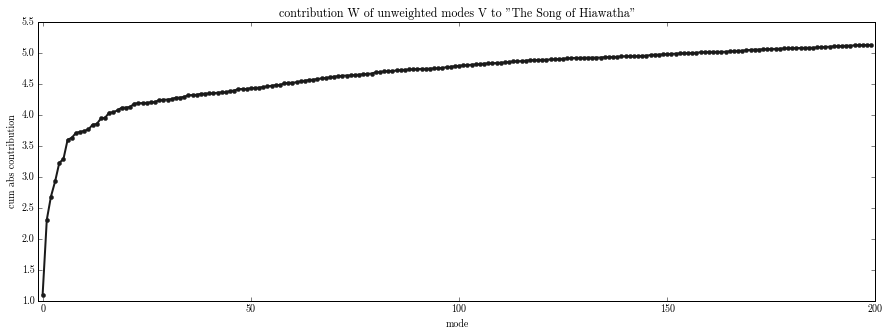

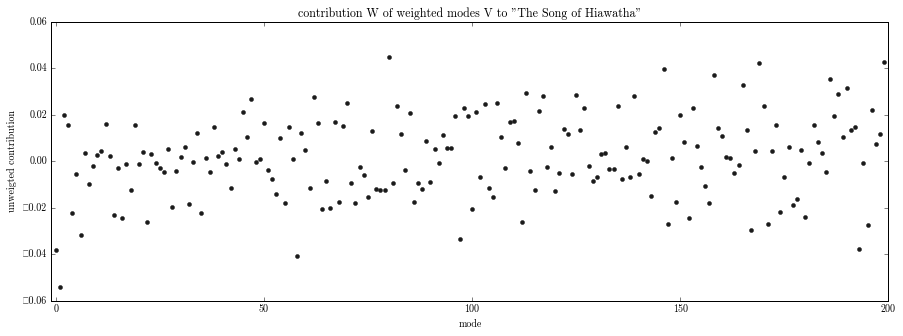

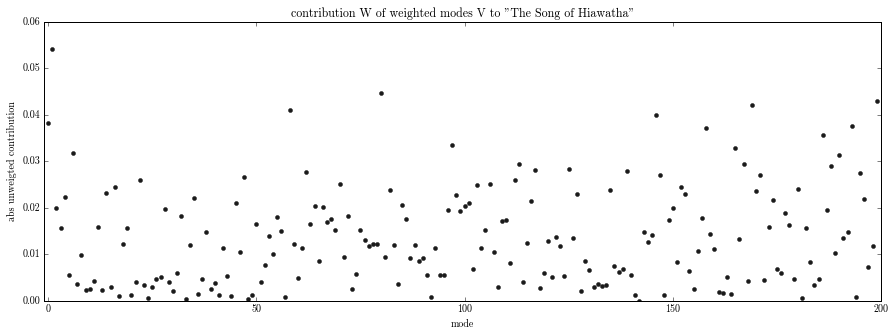

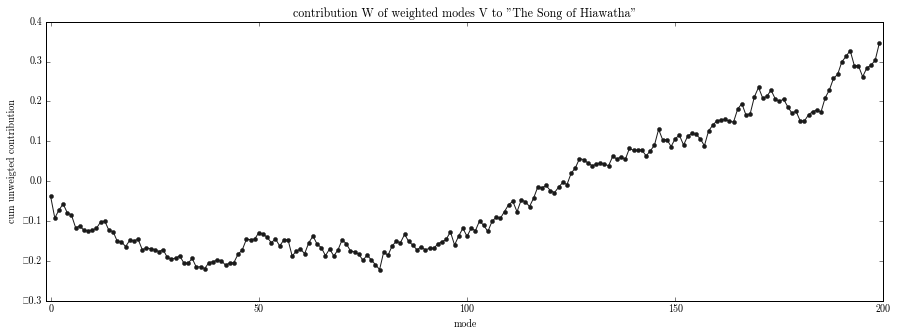

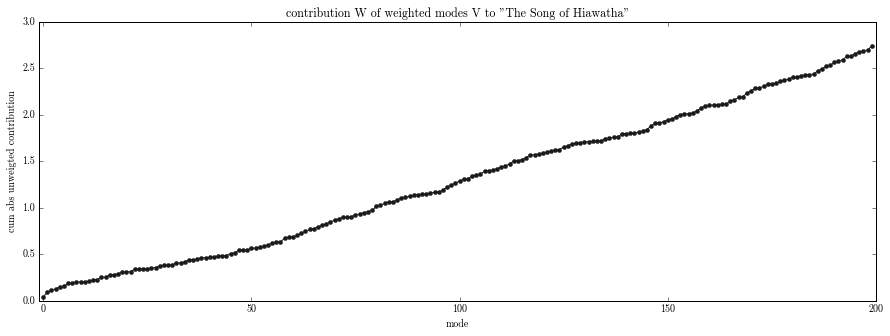

In [29]:
# print(U[0,0]*S[0])
# print(U[0,:200]*S)
w = U[:,:200]*S
# each row entry of w are the contribution of each mode to the timeseries for book i
# where all of book i's entries are in row i
# so, the contribution from mode 1 to all books is column 1
print(w.shape)

i = 5
print(w[i,:].sum())
print(np.abs(w[i,:]).sum())
plt.figure(figsize=(15,5))
plt.plot(w[i,:],".",color=".1",linewidth=1,markersize=8)
plt.xlim([-1,200])
plt.title('contribution W of unweighted modes V to "{0}"'.format(q[i].title))
plt.xlabel('mode')
plt.ylabel('contribution')
mysavefig("SVD-coeff-W-unweighted.pdf",folder="media/figures/SVD",openfig=False)

plt.figure(figsize=(15,5))
plt.plot(np.abs(w[i,:]),".",color=".1",linewidth=1,markersize=8)
plt.xlim([-1,200])
plt.title('contribution W of unweighted modes V to "{0}"'.format(q[i].title))
plt.xlabel('mode')
plt.ylabel('abs contribution')
mysavefig("SVD-coeff-W-unweighted-abs.pdf",folder="media/figures/SVD",openfig=False)

plt.figure(figsize=(15,5))
plt.plot(np.cumsum(w[i,:]),".-",color=".1",linewidth=2,markersize=8)
plt.xlim([-1,200])
plt.title('contribution W of unweighted modes V to "{0}"'.format(q[i].title))
plt.xlabel('mode')
plt.ylabel('cum contribution')
mysavefig("SVD-coeff-W-unweighted-cumsum.pdf",folder="media/figures/SVD",openfig=False)

plt.figure(figsize=(15,5))
plt.plot(np.cumsum(np.abs(w[i,:])),".-",color=".1",linewidth=2,markersize=8)
plt.xlim([-1,200])
plt.title('contribution W of unweighted modes V to "{0}"'.format(q[i].title))
plt.xlabel('mode')
plt.ylabel('cum abs contribution')
mysavefig("SVD-coeff-W-unweighted-abs-cumsum.pdf",folder="media/figures/SVD",openfig=False)


plt.figure(figsize=(15,5))
plt.plot(U[i,:200],".",color=".1",linewidth=1,markersize=8)
plt.xlim([-1,200])
plt.title('contribution W of weighted modes V to "{0}"'.format(q[i].title))
plt.xlabel('mode')
plt.ylabel('unweigted contribution')
mysavefig("SVD-coeff-W-weighted.pdf",folder="media/figures/SVD",openfig=False)

plt.figure(figsize=(15,5))
plt.plot(np.abs(U[i,:200]),".",color=".1",linewidth=1,markersize=8)
plt.xlim([-1,200])
plt.title('contribution W of weighted modes V to "{0}"'.format(q[i].title))
plt.xlabel('mode')
plt.ylabel('abs unweigted contribution')
mysavefig("SVD-coeff-W-weighted-abs.pdf",folder="media/figures/SVD",openfig=False)

plt.figure(figsize=(15,5))
plt.plot(np.cumsum(U[i,:200]),".-",color=".1",linewidth=1,markersize=8)
plt.xlim([-1,200])
plt.title('contribution W of weighted modes V to "{0}"'.format(q[i].title))
plt.xlabel('mode')
plt.ylabel('cum unweigted contribution')
mysavefig("SVD-coeff-W-weighted-cumsum.pdf",folder="media/figures/SVD",openfig=False)

plt.figure(figsize=(15,5))
plt.plot(np.cumsum(np.abs(U[i,:200])),".-",color=".1",linewidth=1,markersize=8)
plt.xlim([-1,200])
plt.title('contribution W of weighted modes V to "{0}"'.format(q[i].title))
plt.xlabel('mode')
plt.ylabel('cum abs unweigted contribution')
mysavefig("SVD-coeff-W-weighted-abs-cumsum.pdf",folder="media/figures/SVD",openfig=False)

In [30]:
np.abs(w[:10,:]).sum(axis=1)

array([ 1.67809768,  1.90827733,  2.41038087,  4.69659229,  5.78958359,
        5.12630966,  9.11657682,  3.37125774,  4.52291395,  4.89087443])

the sum of coefficients is not normalized across the books, some have more energy? they might just have greater contributions by books with smaller weighted timeseries (I've used the singular values here)

### Now use that to reconstruct the full time series from the modes (sanity check)

In [31]:
# squeeze w into the right shape
# transpose doesn't really do it
t = np.dot(np.reshape(w[0,:],(1,200)),V)
print(np.reshape(w[0,:],(1,200)).shape)
print(V.shape)
print(t.shape)
# squeeze w into the right shape
# transpose doesn't really do it
t = np.dot(w,V)
print(V.shape)
print(t.shape)

(1, 200)
(200, 200)
(1, 200)
(200, 200)
(1755, 200)


[ 5.86015566  5.86378075  5.85807055  5.86567697  5.86267838  5.86217091
  5.862322    5.86089846  5.85995208  5.85713376]
[ 0.03651143  0.04013651  0.03442632  0.04203274  0.03903415  0.03852668
  0.03867776  0.03725422  0.03630784  0.03348952]


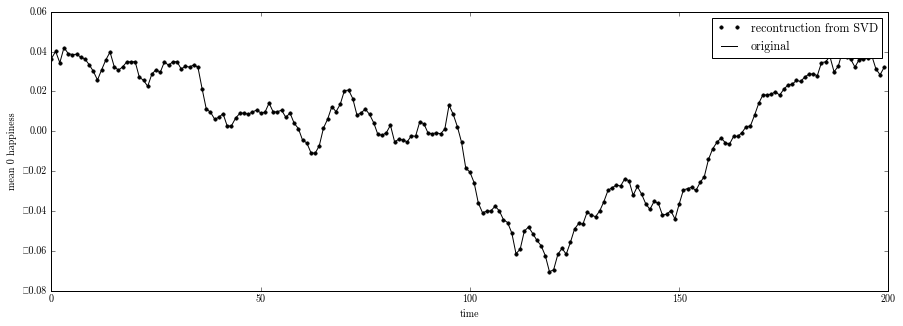

In [32]:
print(big_matrix[0,:10])
print(t[0,:10])
plt.figure(figsize=(15,5))
plt.plot(t[0,:],'k.',markersize=7)
plt.plot(big_matrix[0,:]-np.mean(big_matrix[0,:]),'k-')
plt.legend(["recontruction from SVD","original"])
plt.xlabel("time")
plt.ylabel("mean 0 happiness")
mysavefig("example-timeseries-reconstruction.pdf",folder="media/figures/SVD",openfig=False)

## Look at the books that have most variance explained by individual modes

Going to normalize first within each book so that the coefficients add to 1.

Choosing to do this in W (could also use U).

Just depends whether putting S into U or V (here, putting it into U).

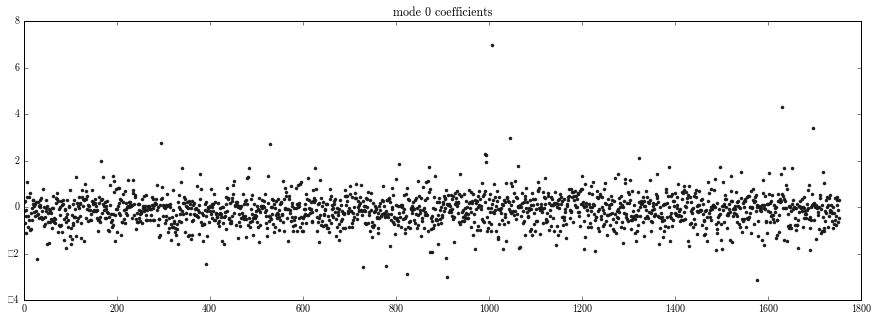

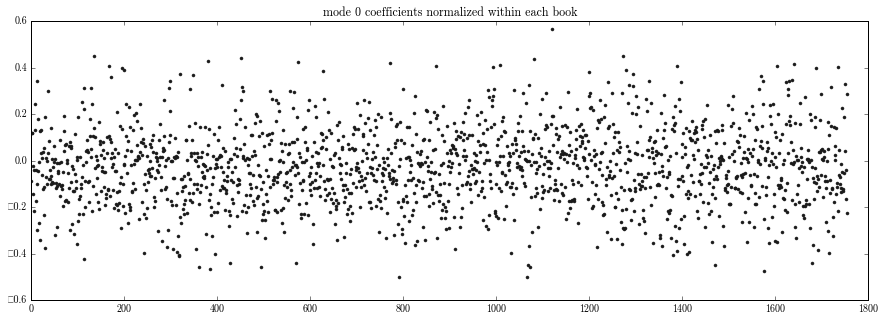

In [33]:
plt.figure(figsize=(15,5))
plt.plot(w[:,0],".",color=".1")
plt.title("mode 0 coefficients")
mysavefig("SVD-coeff-W-mode0-all.pdf",folder="media/figures/SVD",openfig=False)

w_abs = np.abs(w)
w_normalized = np.multiply(w,np.tile(1./w_abs.sum(axis=1),(200,1)).transpose())
plt.figure(figsize=(15,5))
plt.plot(w_normalized[:,0],".",color=".1")
plt.title("mode 0 coefficients normalized within each book")
mysavefig("SVD-coeff-W-mode0-all-norm.pdf",folder="media/figures/SVD",openfig=False)

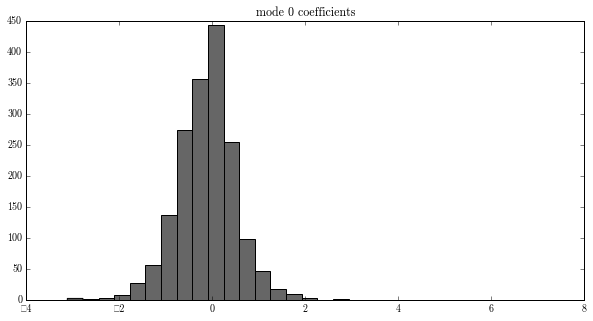

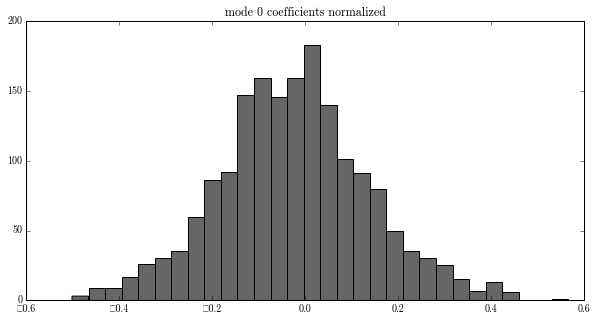

In [34]:
plt.figure(figsize=(10,5))
plt.title("mode 0 coefficients")
a = plt.hist(w[:,0],bins=30,color=".4")
mysavefig("SVD-coeff-W-mode0-all-hist.pdf",folder="media/figures/SVD",openfig=False)

plt.figure(figsize=(10,5))
plt.title("mode 0 coefficients normalized")
a = plt.hist(w_normalized[:,0],bins=30,color=".4")
mysavefig("SVD-coeff-W-mode0-all-norm-hist.pdf",folder="media/figures/SVD",openfig=False)

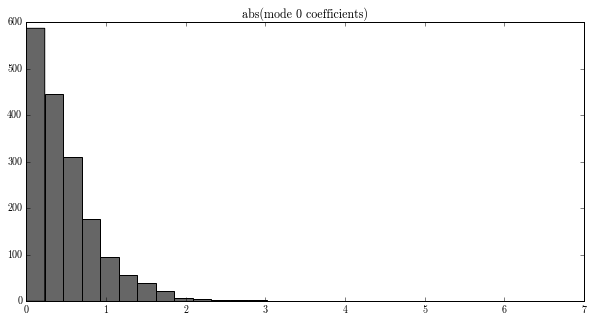

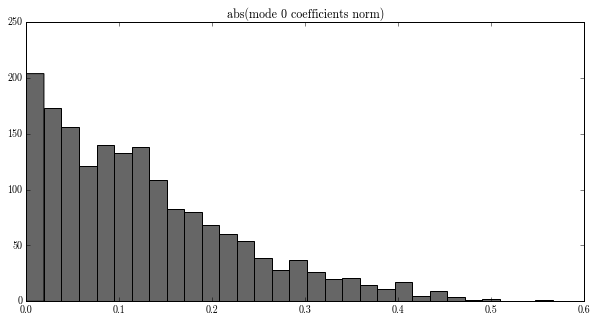

In [35]:
plt.figure(figsize=(10,5))
plt.title("abs(mode 0 coefficients)")
a = plt.hist(np.abs(w[:,0]),bins=30,color=".4")
mysavefig("SVD-coeff-W-mode0-all-hist-abs.pdf",folder="media/figures/SVD",openfig=False)

plt.figure(figsize=(10,5))
plt.title("abs(mode 0 coefficients norm)")
a = plt.hist(np.abs(w_normalized[:,0]),bins=30,color=".4")
mysavefig("SVD-coeff-W-mode0-all-norm-hist-abs.pdf",folder="media/figures/SVD",openfig=False)

In [36]:
mode_0_top_abs = sorted(zip(q,w[:,0],range(len(q))),key=lambda x: np.abs(x[1]),reverse=True)
mode_0_top_pos = sorted(zip(q,w[:,0],range(len(q))),key=lambda x: -x[1])
mode_0_top_neg = sorted(zip(q,w[:,0],range(len(q))),key=lambda x: x[1])
mode_0_top_abs_norm = sorted(zip(q,w_normalized[:,0],range(len(q))),key=lambda x: np.abs(x[1]),reverse=True)
mode_0_top_pos_norm = sorted(zip(q,w_normalized[:,0],range(len(q))),key=lambda x: -x[1])
mode_0_top_neg_norm = sorted(zip(q,w_normalized[:,0],range(len(q))),key=lambda x: x[1])

In [37]:
print("raw")
print(mode_0_top_abs[:2])
print(mode_0_top_pos[:2])
print(mode_0_top_neg[:2])
print("normalized")
print(mode_0_top_abs_norm[:2])
print(mode_0_top_pos_norm[:2])
print(mode_0_top_neg_norm[:2])

raw
[(<Book: A First Spanish Reader>, 6.9643769097637511, 1008), (<Book: The Pipes of War
A Record of Achievements of Pipers of Scottish and Overseas
Regiments during the War 1914-18>, 4.3073396987967909, 1631)]
[(<Book: A First Spanish Reader>, 6.9643769097637511, 1008), (<Book: The Pipes of War
A Record of Achievements of Pipers of Scottish and Overseas
Regiments during the War 1914-18>, 4.3073396987967909, 1631)]
[(<Book: Savrola
A Tale of the Revolution in Laurania>, -3.1156117867258941, 1576), (<Book: The Principles of Masonic Law
A Treatise on the Constitutional Laws, Usages and Landmarks of
Freemasonry>, -3.0117454310337117, 911)]
normalized
[(<Book: Alice's Adventures Under Ground
Being a facsimile of the original Ms. book afterwards developed into "Alice's Adventures in Wonderland">, 0.56599600497219249, 1120), (<Book: A Primary Reader: Old-time Stories, Fairy Tales and Myths Retold by Children>, -0.50155722530520697, 790)]
[(<Book: Alice's Adventures Under Ground
Being a facs

6.96437690976 A First Spanish Reader
4.3073396988 The Pipes of War
A Record of Achievements of Pipers of Scottish and Overseas
Regiments during the War 1914-18
3.4232843222 A Book of Dartmoor
Second Edition
2.99542969142 The Ladies' Work-Book
Containing Instructions In Knitting, Crochet, Point-Lace, etc.
2.74661450955 Divine Comedy, Longfellow's Translation, Complete
2.72108175158 The Common Law
2.30987414667 Mob Rule in New Orleans
Robert Charles and His Fight to Death, the Story of His Life, Burning Human Beings Alive, Other Lynching Statistics
2.23402251144 The Red Record
Tabulated Statistics and Alleged Causes of Lynching in the United States
2.11412008436 Astounding Stories of Super-Science February 1930
1.9991415768 The Road to Oz


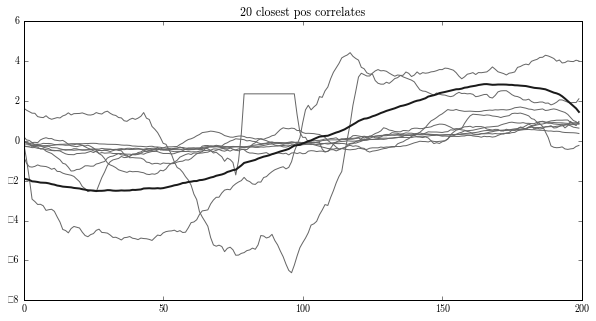

In [38]:
plt.figure(figsize=(10,5))
plt.title('20 closest pos correlates')
for b,s,i in mode_0_top_pos[:10]:
    # multiply each by the contribution (why?)
    plt.plot(big_matrix_mean0[i]*s,color=".4")
    print(s,b.title)
# weighted mode
plt.plot(V[0,:]*S[0],color=".1",linewidth=2)

0.565996004972 Alice's Adventures Under Ground
Being a facsimile of the original Ms. book afterwards developed into "Alice's Adventures in Wonderland"
0.451366138052 The History Of The Decline And Fall Of The Roman Empire
Table of Contents with links in the HTML file to the two
Project Gutenberg editions (12 volumes)
0.448630946399 The Ballad of Reading Gaol
0.444211897753 The Human Comedy: Introductions and Appendix
0.437341674996 The Art of War
0.429974406256 Dreams
0.426555286807 Barrack Room Ballads
0.418558902445 Adventures of Huckleberry Finn, Chapters 01 to 05
0.417178724936 More About the Squirrels
0.409967560191 A First Spanish Reader


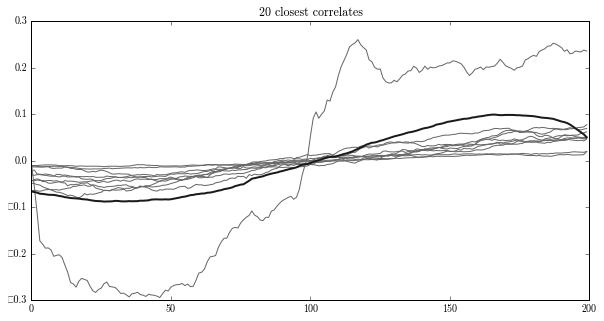

In [39]:
plt.figure(figsize=(10,5))
plt.title('20 closest correlates')
j = 0
for b,s,i in mode_0_top_pos_norm[:10]:
    plt.plot(big_matrix_mean0[i]*s,color=".4")
    # plt.plot(big_matrix_mean0[i],color=".4")
    print(s,b.title)
    j += 1
# plt.plot(V[0,:]*S[0],color=".1",linewidth=2)
plt.plot(V[0,:],color=".1",linewidth=2)

## Note:

Not a simple story here about each of these timeseries are explained by the modes.

They each have effectively a coefficient for the mode,
and so to show the stories and the mode on the same plot,
it really only makes sense to do so one at a time.

For each book, I can put the coefficients on each mode and show those modes.
But, if I show a bunch of different books, they all have different coefficients.
*I could try to normalize each book timeseries by it's energy...*

Here is a look at the reconstruction of a single book:

0.565996004972 1120 Alice's Adventures Under Ground
Being a facsimile of the original Ms. book afterwards developed into "Alice's Adventures in Wonderland"
0.565996004972 1120 Alice's Adventures Under Ground
Being a facsimile of the original Ms. book afterwards developed into "Alice's Adventures in Wonderland"
0.565996004972 1120 Alice's Adventures Under Ground
Being a facsimile of the original Ms. book afterwards developed into "Alice's Adventures in Wonderland"
0.565996004972 1120 Alice's Adventures Under Ground
Being a facsimile of the original Ms. book afterwards developed into "Alice's Adventures in Wonderland"
0.565996004972 1120 Alice's Adventures Under Ground
Being a facsimile of the original Ms. book afterwards developed into "Alice's Adventures in Wonderland"
0.565996004972 1120 Alice's Adventures Under Ground
Being a facsimile of the original Ms. book afterwards developed into "Alice's Adventures in Wonderland"
0.565996004972 1120 Alice's Adventures Under Ground
Being a facs

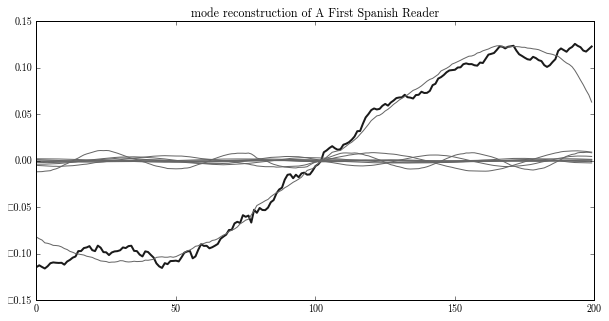

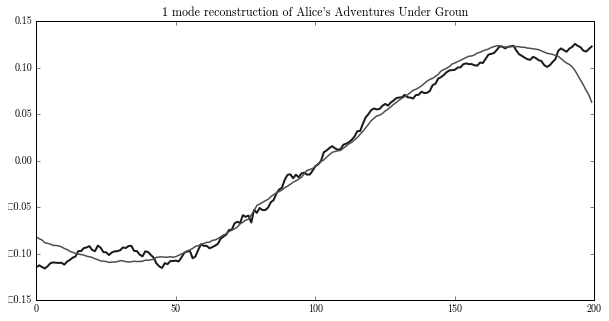

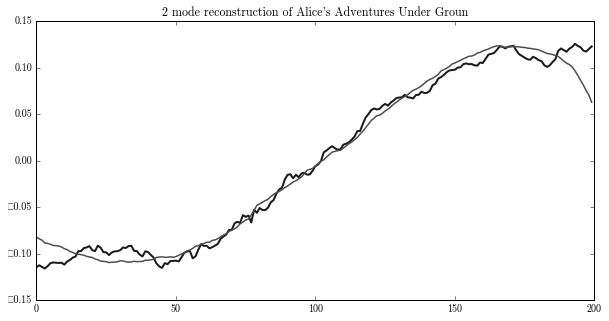

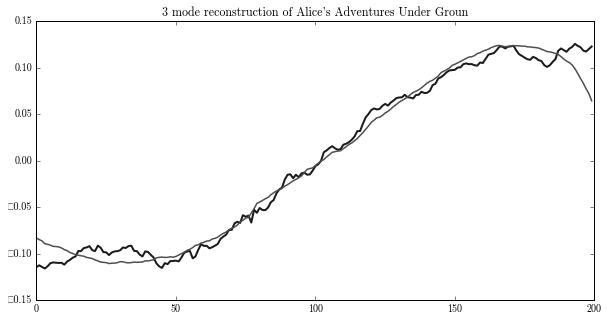

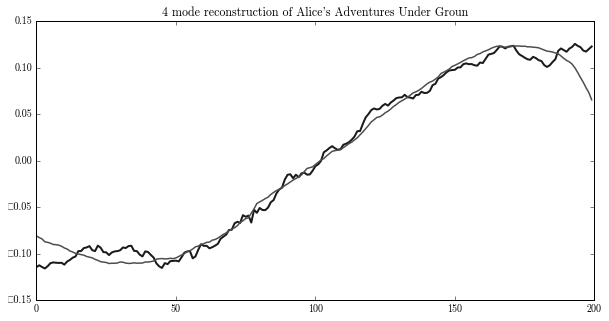

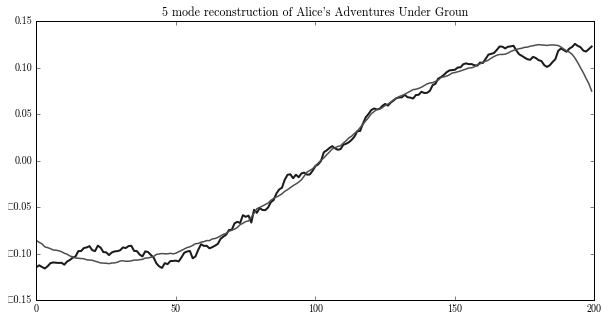

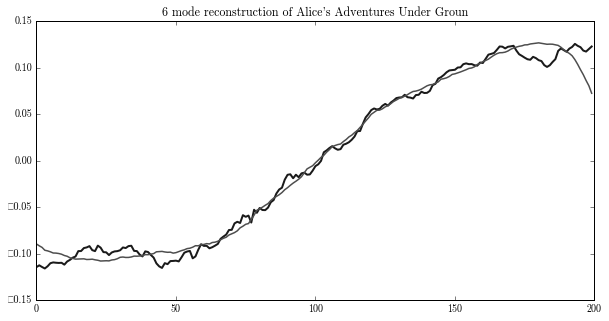

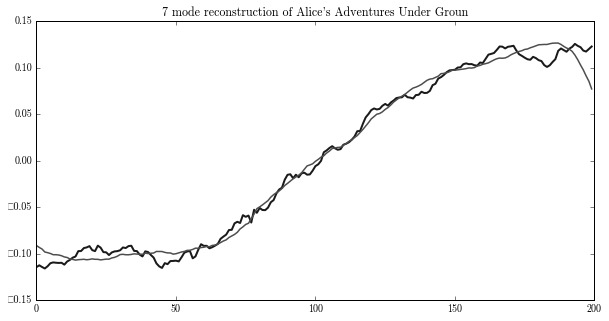

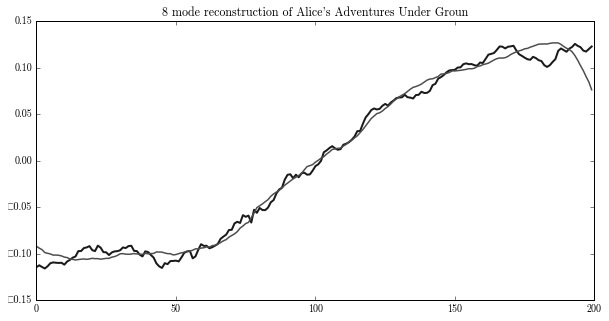

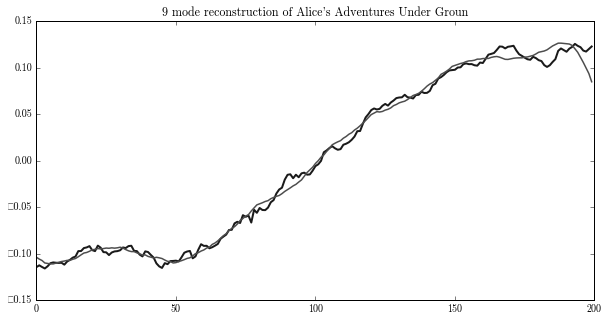

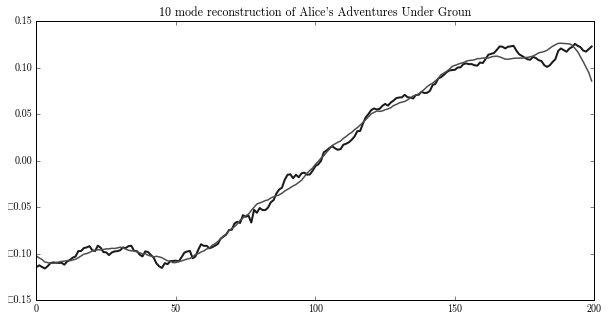

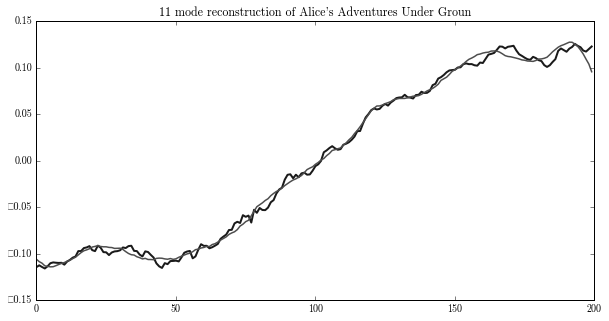

In [40]:
plt.figure(figsize=(10,5))
plt.title('mode reconstruction of {}'.format(b.title[:30]))
j = 0
b,s,i = mode_0_top_pos_norm[0]
plt.plot(big_matrix_mean0[i],color=".1",linewidth=2)
print(s,i,b.title)
j=0
plt.plot(V[j,:]*w[i,j],color=".4",linewidth=1)
for j in range(1,10):
    plt.plot(V[j,:]*w[i,j],color=".4",linewidth=1)
# plt.plot(V[1,:]*w[i,1],color=".4",linewidth=1)
# plt.plot(V[2,:]*w[i,2],color=".4",linewidth=1)
# plt.plot(V[3,:]*w[i,3],color=".4",linewidth=1)
# plt.plot(V[4,:]*w[i,4],color=".4",linewidth=1)
mysavefig("example-timeseries-recon-all.pdf",folder="media/figures/SVD",openfig=False)

for k in range(1,12):
    plt.figure(figsize=(10,5))
    plt.title('{} mode reconstruction of {}'.format(k,b.title[:30]))
    b,s,i = mode_0_top_pos_norm[0]
    plt.plot(big_matrix_mean0[i],color=".1",linewidth=2)
    print(s,i,b.title)
    reconstruction = np.zeros(V[j,:].shape)
    for j in range(0,k):
        reconstruction += V[j,:]*w[i,j]
    plt.plot(reconstruction,color=".3",linewidth=1.5)
    mysavefig("example-timeseries-recon-iter-{}.pdf".format(k),folder="media/figures/SVD",openfig=False)

0.565996004972 Alice's Adventures Under Ground
Being a facsimile of the original Ms. book afterwards developed into "Alice's Adventures in Wonderland"
0.451366138052 The History Of The Decline And Fall Of The Roman Empire
Table of Contents with links in the HTML file to the two
Project Gutenberg editions (12 volumes)
0.448630946399 The Ballad of Reading Gaol
0.444211897753 The Human Comedy: Introductions and Appendix
0.437341674996 The Art of War
0.429974406256 Dreams
0.426555286807 Barrack Room Ballads
0.418558902445 Adventures of Huckleberry Finn, Chapters 01 to 05
0.417178724936 More About the Squirrels
0.409967560191 A First Spanish Reader
6.96437690976 A First Spanish Reader
4.3073396988 The Pipes of War
A Record of Achievements of Pipers of Scottish and Overseas
Regiments during the War 1914-18
3.4232843222 A Book of Dartmoor
Second Edition
2.99542969142 The Ladies' Work-Book
Containing Instructions In Knitting, Crochet, Point-Lace, etc.
2.74661450955 Divine Comedy, Longfellow's 

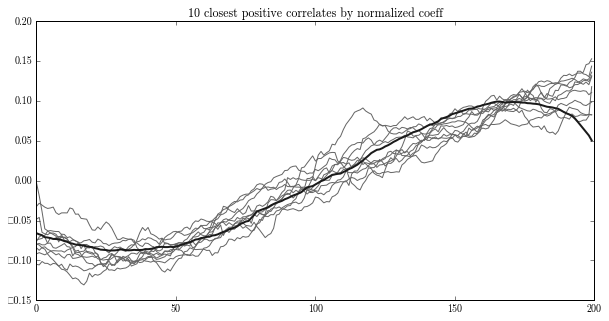

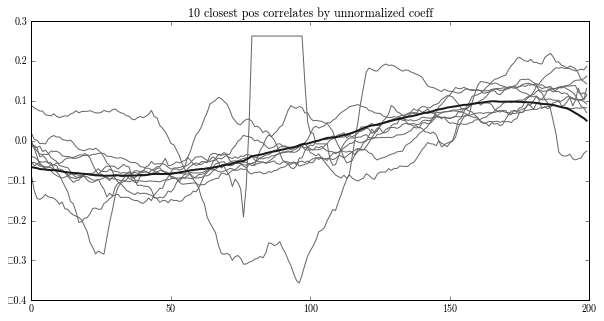

In [41]:
plt.figure(figsize=(10,5))
plt.title('10 closest positive correlates by normalized coeff')
j = 0
for b,s,i in mode_0_top_pos_norm[:10]:
    plt.plot(big_matrix_mean0[i]/np.sum(np.abs(w[i,:]))/s,color=".4")
    # plt.plot(big_matrix_mean0[i],color=".4")
    print(s,b.title)
    j += 1
# plt.plot(V[0,:]*S[0],color=".1",linewidth=2)
plt.plot(V[0,:],color=".1",linewidth=2)

plt.figure(figsize=(10,5))
plt.title('10 closest pos correlates by unnormalized coeff')
j = 0
for b,s,i in mode_0_top_pos[:10]:
    plt.plot(big_matrix_mean0[i]/np.sum(np.abs(w[i,:]))/w_normalized[i,0],color=".4")
    # plt.plot(big_matrix_mean0[i],color=".4")
    print(s,b.title)
    j += 1
# plt.plot(V[0,:]*S[0],color=".1",linewidth=2)
plt.plot(V[0,:],color=".1",linewidth=2)

-0.501557225305 A Primary Reader: Old-time Stories, Fairy Tales and Myths Retold by Children
-0.499566511578 The House of the Vampire
-0.474877230335 Savrola
A Tale of the Revolution in Laurania
-0.46438751092 Romeo and Juliet
-0.458777909052 Three Ghost Stories
-0.458540454691 The Duchess of Malfi
-0.458056536346 The Dance (by An Antiquary)
Historic Illustrations of Dancing from 3300 B.C. to 1911 A.D.
-0.450309204051 The Oldest Code of Laws in the World
The code of laws promulgated by Hammurabi, King of Babylon
B.C. 2285-2242
-0.449817013868 Poems
-0.440795814648 A Chautauqua Idyl
-3.11561178673 Savrola
A Tale of the Revolution in Laurania
-3.01174543103 The Principles of Masonic Law
A Treatise on the Constitutional Laws, Usages and Landmarks of
Freemasonry
-2.88225497452 The Divine Comedy by Dante, Illustrated
-2.58471167138 The Institutes of Justinian
-2.51735604504 Second Treatise of Government
-2.41850578448 The Last Days of Pompeii
-2.2219248686 The Scarlet Pimpernel
-2.198518438

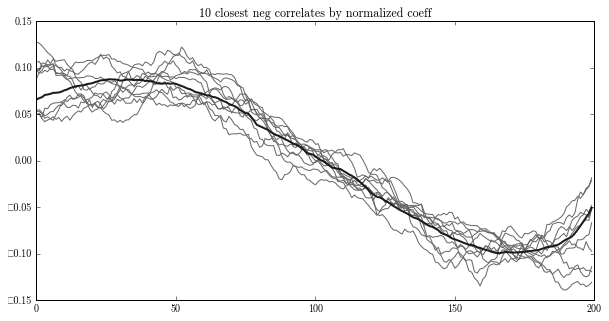

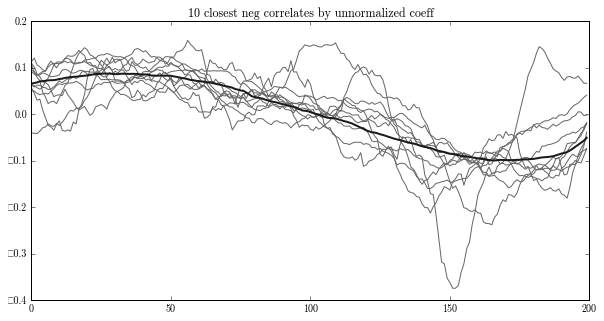

In [42]:
plt.figure(figsize=(10,5))
plt.title('10 closest neg correlates by normalized coeff')
j = 0
for b,s,i in mode_0_top_neg_norm[:10]:
    plt.plot(-big_matrix_mean0[i]/np.sum(np.abs(w[i,:]))/s,color=".4")
    # plt.plot(big_matrix_mean0[i],color=".4")
    print(s,b.title)
    j += 1
# plt.plot(V[0,:]*S[0],color=".1",linewidth=2)
plt.plot(-V[0,:],color=".1",linewidth=2)

plt.figure(figsize=(10,5))
plt.title('10 closest neg correlates by unnormalized coeff')
j = 0
for b,s,i in mode_0_top_neg[:10]:
    plt.plot(-big_matrix_mean0[i]/np.sum(np.abs(w[i,:]))/w_normalized[i,0],color=".4")
    # plt.plot(big_matrix_mean0[i],color=".4")
    print(s,b.title)
    j += 1
# plt.plot(V[0,:]*S[0],color=".1",linewidth=2)
plt.plot(-V[0,:],color=".1",linewidth=2)

## could put these all on the same plot (by flipping them....but the sign matters here!)

again this seems to be an issue with the SVD though.

it is finding the modes that explain the most variance using BOTH versions of the mode

...which is not what we want!! ex: man in the whole is the main story.

it will struggle to find this because it will need to explain with the negative of this!

In [43]:
num_modes = 10
all_lists = [{} for i in range(num_modes)]
for m in range(num_modes):
    all_lists[m]["top_abs"] = sorted(zip(q,w[:,m],range(len(q))),key=lambda x: np.abs(x[1]),reverse=True)
    all_lists[m]["top_pos"] = sorted(zip(q,w[:,m],range(len(q))),key=lambda x: -x[1])
    all_lists[m]["top_neg"] = sorted(zip(q,w[:,m],range(len(q))),key=lambda x: x[1])
    all_lists[m]["top_abs_norm"] = sorted(zip(q,w_normalized[:,m],range(len(q))),key=lambda x: np.abs(x[1]),reverse=True)
    all_lists[m]["top_pos_norm"] = sorted(zip(q,w_normalized[:,m],range(len(q))),key=lambda x: -x[1])
    all_lists[m]["top_neg_norm"] = sorted(zip(q,w_normalized[:,m],range(len(q))),key=lambda x: x[1])

In [108]:
def plot_svs(svstart,v=True,fix_ylim=0.0,xspacing=.01):
    nsvs = 3
    xoffset = .1
    xwidth = (1.-xoffset)/(nsvs)-xspacing
    print('xwidth is {0}'.format(xwidth))
    
    chars = 60
    
    fig = plt.figure(figsize=(15,10))
    for sv in range(0,3):
        print(sv)
        # ind = np.argsort(w[:,sv+svstart])[-20:]
        ax1rect = [xoffset+sv*(xspacing+xwidth),.6,xwidth,.35]
        ax1 = fig.add_axes(ax1rect)
        ax1books = fig.add_axes([xoffset+sv*(xspacing+xwidth),.5,xwidth,.1])
        # ax1books.text?
        # ax.set_title('20 closest positive correlates')
        if v:
            print('-'*80)
            print('20 closest positive correlates:')
        j=0
        for b,s,i in all_lists[sv+svstart]["top_pos_norm"][:20]:
            ax1.plot(-big_matrix_mean0[i]/np.sum(np.abs(w[i,:]))/s,color=".4",label=None)
            # plt.plot(big_matrix_mean0[i],color=".4")
            if v:
                print(s,b.title)
            if j<5:
                if len(b.title) > chars:
                    ax1books.text(0.0,.8-j*.2,'{0}: {1}...'.format(j+1,b.title[:chars-3].replace("\n",": ")),fontsize=10)
                else:
                    ax1books.text(0.0,.8-j*.2,'{0}: {1}'.format(j+1,b.title.replace("\n",": ")),fontsize=10)
            j+=1
        ax1.plot(-V[sv+svstart,:],color="#ff6700",linewidth=2,label="SV {}".format(sv+svstart+1))
        ax1.set_xticklabels([])
        ax1.legend(loc="best")

        #ax1.axis('off')
        ax1books.axis('off')

        ax2 = fig.add_axes([xoffset+sv*(xspacing+xwidth),.1,xwidth,.35])
        ax2books = fig.add_axes([xoffset+sv*(xspacing+xwidth),.0,xwidth,.1])
        # ax2.set_title('20 closest negative correlates')
        if v:
            print('-'*80)
            print('20 closest negative correlates:')
        j=0
        for b,s,i in all_lists[sv+svstart]["top_neg_norm"][:20]:
            ax2.plot(big_matrix_mean0[i]/np.sum(np.abs(w[i,:]))/s,color=".4",label=None)
            # plt.plot(big_matrix_mean0[i],color=".4")
            if v:
                print(s,b.title)
            if j<5:
                if len(b.title) > chars:
                    ax2books.text(0.0,.8-j*.2,'{0}: {1}...'.format(j+1,b.title[:chars-3].replace("\n",": ")),fontsize=10)
                else:
                    ax2books.text(0.0,.8-j*.2,'{0}: {1}'.format(j+1,b.title.replace("\n",": ")),fontsize=10)
            j+=1
        ax2.plot(V[sv+svstart,:],color="#ff6700",linewidth=2,label="-- (SV {})".format(sv+svstart+1))
        ax2.set_xticklabels([])
        ax2.legend(loc="best")

        #ax1.axis('off')
        ax2books.axis('off')
        
        if fix_ylim > 0:
            ax1.set_ylim([-fix_ylim,fix_ylim])
            ax2.set_ylim([-fix_ylim,fix_ylim])
        if sv > 0:
            ax1.set_yticklabels([])
            ax2.set_yticklabels([])
            
            
    # mysavefig('SV{0}.svg'.format('4-6'))
    mysavefig("SVD-timeseries-mode-{}-{}.png".format(svstart+1,svstart+4),folder="media/figures/SVD",openfig=False)
    mysavefig("SVD-timeseries-mode-{}-{}.pdf".format(svstart+1,svstart+4),folder="media/figures/SVD",openfig=False)

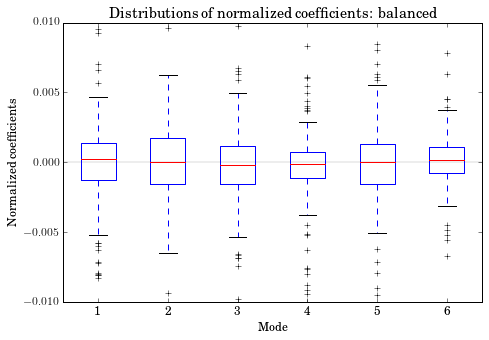

In [109]:
plt.figure(figsize=(7.5,5))
plt.plot([-1,7],[0.0,0.0],"-",linewidth=2,color=".93",zorder=1)
plt.boxplot(w_normalized[0:6,:].transpose())
plt.ylim([-.01,.01])
plt.xlabel("Mode")
plt.ylabel("Normalized coefficients")
plt.title("Distributions of normalized coefficients: balanced")
mysavefig("SVD-W-norm-boxplot.pdf",folder="media/figures/SVD",openfig=False)

In [110]:
rc('font', family='serif')
rc('font', family='cmr10')
rc('text', usetex='true') 

rcParams.update({'font.size': 12})
# import matplotlib.pyplot as plt
# %matplotlib inline

xwidth is 0.29
0
1
2


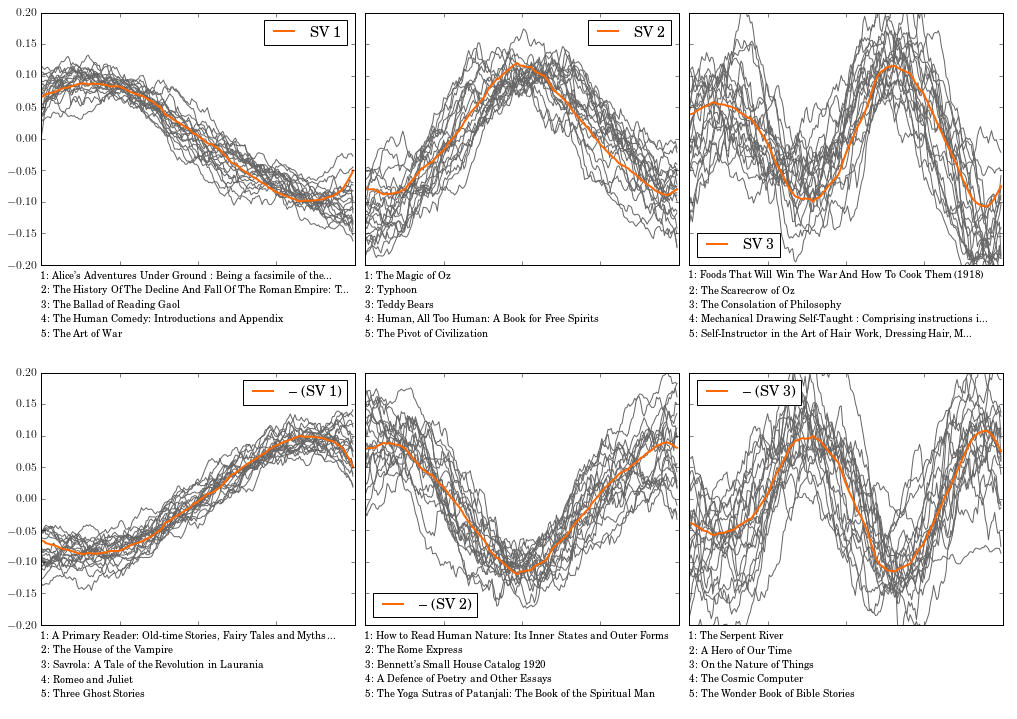

In [111]:
plot_svs(0,v=False,fix_ylim=.2)

xwidth is 0.29
0
1
2


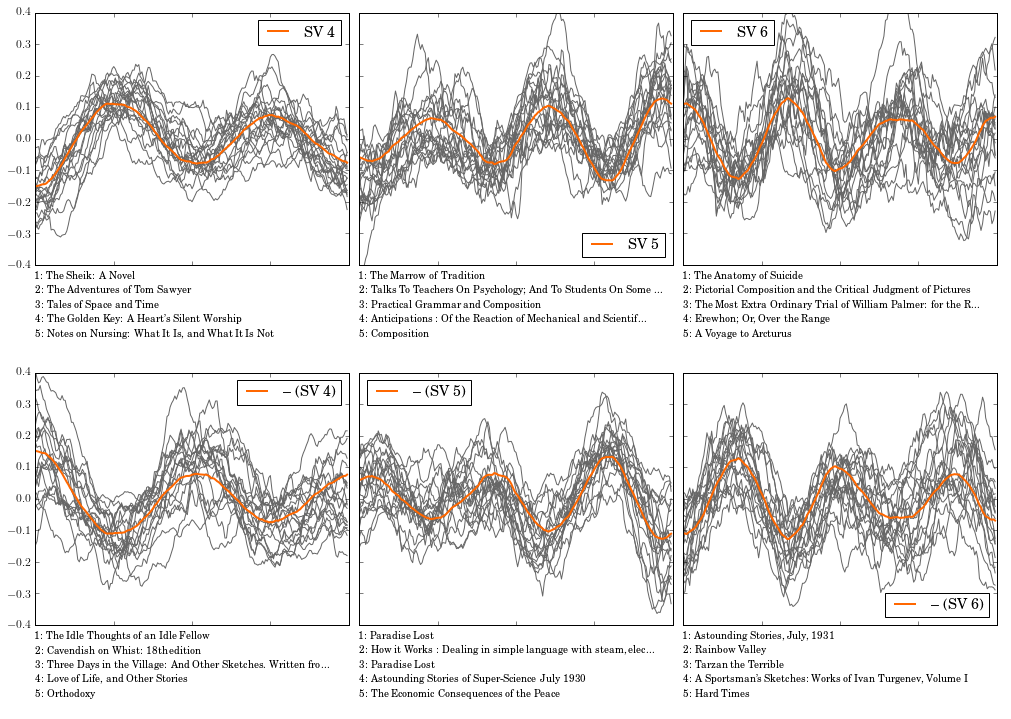

In [112]:
plot_svs(3,v=False,fix_ylim=.4)